This is a possible alternative way to align two embeddings using adversarial training. Yet, there is not unique criterion to stop the training. After experimenting with hyperparameters for certain time, we can conclude that picture obtained does not align the two sets properly. Points tend rather to mach then to interrelate.

In [1]:
import random
import os
import sys

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import networkx as nx 
import pylab

from gensim.models import Word2Vec
from sklearn.decomposition import PCA

In [2]:
class GraphLanguage:
    def __init__(self, dataset_size, num_states, max_sequence_size, connection):
        self.dataset_size = dataset_size
        self.max_sequence_size = max_sequence_size
        self.num_states = num_states
        self.connection = connection
    def generate_graph(self):
        G = nx.DiGraph()
        H = range(1,self.num_states+1)
        G.add_nodes_from(H)
        list_of_edges =[]
        edge_labels = {}
        for i in range(1, self.num_states):
            for j in range(1, self.num_states+1):
                d = np.random.randn()
                if d < self.connection and i != j:
                    e = (i,j)
                    list_of_edges.append(e)
                    edge_labels[e] = str(i)+'e'+str(j)
        G.add_edges_from(list_of_edges)
        # connection  = -1.25
        nx.draw(G,pos = nx.spring_layout(G), with_labels=True) 
        pylab.show()
  
        sample_events = []
        sample_relations = []
        for _ in range(self.dataset_size):
            sequence_list = []
            sample_rel = []
            sequence_size = random.randint(1, self.max_sequence_size)
            l_descendants = []
            node = random.randint(1, self.num_states)
            l_descendants.append(node)
            successors = G.successors(node)
            l_successors = list(successors)
            while l_successors and (len(l_descendants) <= sequence_size): 
                successor = random.choice(l_successors)
                node = successor
                l_descendants.append(node)
                successors = G.successors(node)
                l_successors = list(successors)
                str_descendants = [str(item) for item in l_descendants]
                #sequence_list.append(l_descendants)
            for j in range(len(str_descendants)-1):
                rel_list = str_descendants[j]+'s'+str_descendants[j+1]
                sample_rel.append(rel_list)
            sample_relations.append(sample_rel)
            sample_events.append(str_descendants)
        return sample_events, sample_relations

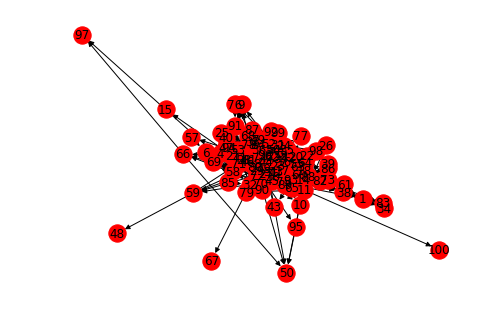

In [3]:
graph = GraphLanguage(100000, 100, 100, -1.9)
graph_probes, relation_probes = graph.generate_graph()

In [4]:
model1 = Word2Vec(graph_probes, size = 5, workers = 2, sg = 1, min_count=1)
model2 = Word2Vec(relation_probes, size = 5, workers = 2, sg = 1, min_count = 1)
probes = np.concatenate([graph_probes, relation_probes])
random.shuffle(probes)

In [5]:
words1 = list(model1.wv.vocab)
words2 = list(model2.wv.vocab)
print(words1)
print(words2)

['12', '80', '58', '70', '81', '4', '85', '32', '67', '40', '41', '20', '75', '13', '38', '60', '26', '63', '51', '45', '53', '25', '35', '87', '84', '69', '27', '82', '96', '77', '3', '19', '72', '98', '24', '37', '34', '83', '1', '43', '50', '6', '21', '10', '55', '86', '73', '11', '100', '42', '76', '91', '39', '14', '61', '64', '23', '57', '15', '94', '29', '59', '71', '97', '33', '31', '5', '44', '88', '2', '49', '47', '99', '36', '17', '65', '93', '66', '78', '54', '46', '8', '89', '28', '9', '56', '68', '18', '92', '16', '52', '62', '48', '74', '79', '7', '22', '95', '90', '30']
['12s80', '80s58', '58s70', '70s81', '81s58', '70s4', '4s85', '85s32', '32s67', '40s41', '41s85', '32s20', '20s75', '75s13', '13s38', '38s60', '60s26', '26s63', '63s51', '51s32', '45s53', '53s25', '25s4', '32s53', '32s35', '35s87', '87s81', '81s84', '84s87', '58s69', '69s58', '32s41', '41s70', '81s27', '27s82', '82s96', '96s77', '77s3', '3s19', '19s53', '53s72', '72s98', '98s24', '24s37', '37s38', '38s34

In [6]:
state2vec1 = {}
for s in words1:
    state2vec1[s] = model1.wv.__getitem__(s)
state2vec2 = {}
for s in words2:
    state2vec2[s] = model2.wv.__getitem__(s)

In [7]:
X1 = model1.wv.__getitem__(model1.wv.vocab)
X2 = model2.wv.__getitem__(model2.wv.vocab)

In [8]:
X1 # states in 5dim embedding

array([[ 1.41493058e+00,  2.38962084e-01, -3.41992736e-01,
        -3.84380311e-01, -7.45325327e-01],
       [ 8.79805803e-01,  1.57993972e-01, -2.33934775e-01,
        -2.38265306e-01, -9.09230471e-01],
       [ 2.57432908e-01,  1.01086900e-01, -4.05826062e-01,
         9.52924728e-01, -6.11817837e-01],
       [ 3.29455525e-01,  5.48422150e-02, -7.27872252e-01,
         6.83544695e-01, -3.33723187e-01],
       [ 2.16189008e-02,  2.58737564e-01, -7.58300364e-01,
         4.20750469e-01, -1.05181301e+00],
       [ 2.42465630e-01, -6.75111771e-01, -1.27139807e-01,
         6.37877226e-01,  5.94017170e-02],
       [ 1.03083238e-01, -7.36852765e-01, -2.46746853e-01,
         4.93496031e-01,  4.27787080e-02],
       [ 1.92526773e-01, -6.61297321e-01, -1.48093939e-01,
         2.74848878e-01, -1.37055963e-01],
       [ 1.09002046e-01, -8.16160738e-01, -4.51833867e-02,
         1.88682616e-01, -1.29650086e-01],
       [ 4.80401106e-02, -5.99451780e-01, -8.51541519e-01,
         3.36610585e-01

In [9]:
len(X1)

100

In [10]:
pca = PCA(n_components=2, whiten = True)
result1 = pca.fit_transform(X1)
result2 = pca.fit_transform(X2)

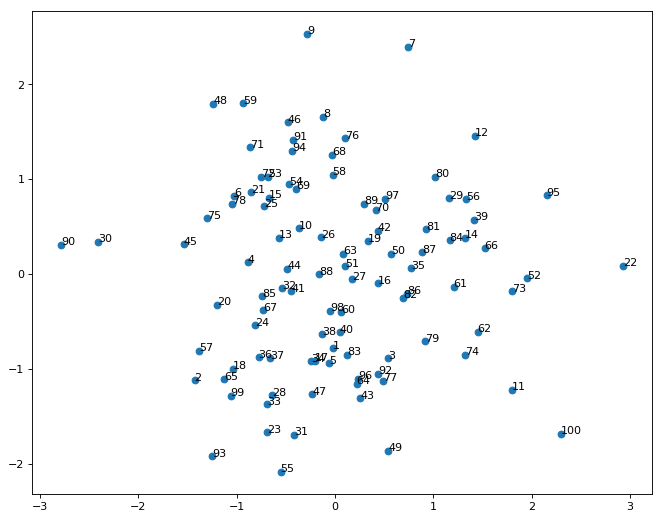

In [11]:
plt.figure(figsize=(10, 8), dpi=80)
plt.scatter(result1[:, 0], result1[:, 1])
words1 = list(model1.wv.vocab)
for i, word in enumerate(words1):
    plt.annotate(word, xy=(result1[i, 0], result1[i, 1]))
plt.show()

In [12]:
data = X1

In [13]:
import tensorflow as tf

In [14]:
def generator(Z,hsize=[16, 32, 64],reuse=False):
    with tf.variable_scope("gen",reuse=reuse):
        h1 = tf.layers.dense(Z,hsize[0], activation = tf.nn.leaky_relu)
        h2 = tf.layers.dense(h1,hsize[1], activation = tf.nn.leaky_relu)
        h3 = tf.layers.dense(h2,hsize[2], activation = tf.nn.leaky_relu)
        out = tf.layers.dense(h3,5)# 5 is the dim of embedding space
    return out

In [15]:
def discriminator(X,hsize=[64, 32, 16],reuse=False):
    with tf.variable_scope("dis",reuse=reuse):
        h1 = tf.layers.dense(X,hsize[0], activation = tf.nn.leaky_relu)
        h2 = tf.layers.dense(h1,hsize[1], activation = tf.nn.leaky_relu)
        h3 = tf.layers.dense(h2,hsize[2], activation = tf.nn.leaky_relu)
        h4 = tf.layers.dense(h3,5)
        out = tf.layers.dense(h4,1)
    return out, h4

In [16]:
X = tf.placeholder(tf.float32,[None,5])
Z = tf.placeholder(tf.float32,[None,5])
G_sample = generator(Z)
r_logits, r_rep = discriminator(X)
f_logits, g_rep = discriminator(G_sample,reuse=True)

In [17]:
disc_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=r_logits,labels=tf.ones_like(r_logits)) + tf.nn.sigmoid_cross_entropy_with_logits(logits=f_logits,labels=tf.zeros_like(f_logits)))
gen_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=f_logits,labels=tf.ones_like(f_logits)))

In [18]:
gen_vars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES,scope="gen")
disc_vars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES,scope="dis")

gen_step = tf.train.AdamOptimizer(learning_rate=0.0005).minimize(gen_loss,var_list = gen_vars)
disc_step = tf.train.AdamOptimizer(learning_rate=0.0005).minimize(disc_loss,var_list = disc_vars)

In [19]:
sess = tf.Session()

In [20]:
tf.global_variables_initializer().run(session = sess)

In [21]:
batch_size = len(X1)
nd_steps = 5
ng_steps = 5

In [22]:
x_plot = X1

In [23]:
def sample_Z(m, n):
    return np.random.uniform(-1., 1., size=[m, n])

Iterations: 0	 Discriminator loss: 1.4958	 Generator loss: 0.7251
Iterations: 10	 Discriminator loss: 1.3392	 Generator loss: 0.6662
Iterations: 20	 Discriminator loss: 1.4238	 Generator loss: 0.6942
Iterations: 30	 Discriminator loss: 1.4251	 Generator loss: 0.5705
Iterations: 40	 Discriminator loss: 1.1906	 Generator loss: 0.9733
Iterations: 50	 Discriminator loss: 1.5043	 Generator loss: 0.6183
Iterations: 60	 Discriminator loss: 1.1675	 Generator loss: 0.6704
Iterations: 70	 Discriminator loss: 1.3927	 Generator loss: 0.6032
Iterations: 80	 Discriminator loss: 1.2062	 Generator loss: 0.8316
Iterations: 90	 Discriminator loss: 1.2291	 Generator loss: 0.6410
Iterations: 100	 Discriminator loss: 1.2168	 Generator loss: 0.7749
Iterations: 110	 Discriminator loss: 1.2230	 Generator loss: 0.9284
Iterations: 120	 Discriminator loss: 1.2972	 Generator loss: 0.4713
Iterations: 130	 Discriminator loss: 1.2267	 Generator loss: 1.5526
Iterations: 140	 Discriminator loss: 1.5327	 Generator loss

Iterations: 1210	 Discriminator loss: 1.2962	 Generator loss: 0.7596
Iterations: 1220	 Discriminator loss: 1.1528	 Generator loss: 0.8209
Iterations: 1230	 Discriminator loss: 1.1656	 Generator loss: 0.9349
Iterations: 1240	 Discriminator loss: 1.3381	 Generator loss: 0.7295
Iterations: 1250	 Discriminator loss: 1.0786	 Generator loss: 0.9388
Iterations: 1260	 Discriminator loss: 1.1596	 Generator loss: 0.9178
Iterations: 1270	 Discriminator loss: 1.4063	 Generator loss: 0.6709
Iterations: 1280	 Discriminator loss: 1.0255	 Generator loss: 1.0074
Iterations: 1290	 Discriminator loss: 1.5843	 Generator loss: 0.6832
Iterations: 1300	 Discriminator loss: 1.0530	 Generator loss: 0.9646
Iterations: 1310	 Discriminator loss: 1.3947	 Generator loss: 0.7336
Iterations: 1320	 Discriminator loss: 1.1657	 Generator loss: 0.8836
Iterations: 1330	 Discriminator loss: 1.3037	 Generator loss: 0.8484
Iterations: 1340	 Discriminator loss: 1.1791	 Generator loss: 0.8585
Iterations: 1350	 Discriminator lo

/home/plastique/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Iterations: 2010	 Discriminator loss: 1.1751	 Generator loss: 0.8804
Iterations: 2020	 Discriminator loss: 0.9092	 Generator loss: 1.0929
Iterations: 2030	 Discriminator loss: 1.2331	 Generator loss: 0.8931
Iterations: 2040	 Discriminator loss: 1.3702	 Generator loss: 0.7289
Iterations: 2050	 Discriminator loss: 1.3439	 Generator loss: 0.7558
Iterations: 2060	 Discriminator loss: 1.1971	 Generator loss: 0.9277
Iterations: 2070	 Discriminator loss: 1.3878	 Generator loss: 0.7097
Iterations: 2080	 Discriminator loss: 1.2572	 Generator loss: 0.7651
Iterations: 2090	 Discriminator loss: 1.2932	 Generator loss: 0.7717
Iterations: 2100	 Discriminator loss: 1.1649	 Generator loss: 0.9099
Iterations: 2110	 Discriminator loss: 1.2452	 Generator loss: 0.7738
Iterations: 2120	 Discriminator loss: 1.2268	 Generator loss: 0.8704
Iterations: 2130	 Discriminator loss: 1.2133	 Generator loss: 0.8743
Iterations: 2140	 Discriminator loss: 1.2180	 Generator loss: 0.7876
Iterations: 2150	 Discriminator lo

Iterations: 3210	 Discriminator loss: 1.2570	 Generator loss: 0.7870
Iterations: 3220	 Discriminator loss: 1.2690	 Generator loss: 0.7921
Iterations: 3230	 Discriminator loss: 1.2734	 Generator loss: 0.7700
Iterations: 3240	 Discriminator loss: 1.2599	 Generator loss: 0.7846
Iterations: 3250	 Discriminator loss: 1.2715	 Generator loss: 0.7919
Iterations: 3260	 Discriminator loss: 1.2617	 Generator loss: 0.7789
Iterations: 3270	 Discriminator loss: 1.2808	 Generator loss: 0.7721
Iterations: 3280	 Discriminator loss: 1.2771	 Generator loss: 0.7898
Iterations: 3290	 Discriminator loss: 1.2758	 Generator loss: 0.7617
Iterations: 3300	 Discriminator loss: 1.2512	 Generator loss: 0.7867
Iterations: 3310	 Discriminator loss: 1.2693	 Generator loss: 0.7632
Iterations: 3320	 Discriminator loss: 1.2612	 Generator loss: 0.7893
Iterations: 3330	 Discriminator loss: 1.2313	 Generator loss: 0.8096
Iterations: 3340	 Discriminator loss: 1.2223	 Generator loss: 0.8236
Iterations: 3350	 Discriminator lo

Iterations: 4410	 Discriminator loss: 1.2566	 Generator loss: 0.7967
Iterations: 4420	 Discriminator loss: 1.2609	 Generator loss: 0.7933
Iterations: 4430	 Discriminator loss: 1.2562	 Generator loss: 0.7848
Iterations: 4440	 Discriminator loss: 1.2474	 Generator loss: 0.8400
Iterations: 4450	 Discriminator loss: 1.2419	 Generator loss: 0.8192
Iterations: 4460	 Discriminator loss: 1.2541	 Generator loss: 0.8547
Iterations: 4470	 Discriminator loss: 1.2258	 Generator loss: 0.8627
Iterations: 4480	 Discriminator loss: 1.2060	 Generator loss: 0.8592
Iterations: 4490	 Discriminator loss: 1.1979	 Generator loss: 0.8509
Iterations: 4500	 Discriminator loss: 1.2009	 Generator loss: 0.9305
Iterations: 4510	 Discriminator loss: 1.1953	 Generator loss: 0.9012
Iterations: 4520	 Discriminator loss: 1.2061	 Generator loss: 0.9389
Iterations: 4530	 Discriminator loss: 1.2145	 Generator loss: 0.8980
Iterations: 4540	 Discriminator loss: 1.2094	 Generator loss: 0.8705
Iterations: 4550	 Discriminator lo

Iterations: 5600	 Discriminator loss: 1.2342	 Generator loss: 0.8131
Iterations: 5610	 Discriminator loss: 1.2366	 Generator loss: 0.7966
Iterations: 5620	 Discriminator loss: 1.2392	 Generator loss: 0.7742
Iterations: 5630	 Discriminator loss: 1.2551	 Generator loss: 0.7725
Iterations: 5640	 Discriminator loss: 1.2521	 Generator loss: 0.7857
Iterations: 5650	 Discriminator loss: 1.2652	 Generator loss: 0.7904
Iterations: 5660	 Discriminator loss: 1.2377	 Generator loss: 0.7823
Iterations: 5670	 Discriminator loss: 1.2616	 Generator loss: 0.7630
Iterations: 5680	 Discriminator loss: 1.2496	 Generator loss: 0.7741
Iterations: 5690	 Discriminator loss: 1.2483	 Generator loss: 0.7840
Iterations: 5700	 Discriminator loss: 1.2594	 Generator loss: 0.7568
Iterations: 5710	 Discriminator loss: 1.2535	 Generator loss: 0.7658
Iterations: 5720	 Discriminator loss: 1.2605	 Generator loss: 0.7761
Iterations: 5730	 Discriminator loss: 1.2725	 Generator loss: 0.7747
Iterations: 5740	 Discriminator lo

Iterations: 6790	 Discriminator loss: 1.2634	 Generator loss: 0.8634
Iterations: 6800	 Discriminator loss: 1.2565	 Generator loss: 0.9215
Iterations: 6810	 Discriminator loss: 1.2618	 Generator loss: 0.9384
Iterations: 6820	 Discriminator loss: 1.2655	 Generator loss: 0.9185
Iterations: 6830	 Discriminator loss: 1.2568	 Generator loss: 0.9220
Iterations: 6840	 Discriminator loss: 1.2593	 Generator loss: 0.9350
Iterations: 6850	 Discriminator loss: 1.2585	 Generator loss: 0.8839
Iterations: 6860	 Discriminator loss: 1.2610	 Generator loss: 0.8436
Iterations: 6870	 Discriminator loss: 1.2655	 Generator loss: 0.8548
Iterations: 6880	 Discriminator loss: 1.2595	 Generator loss: 0.8733
Iterations: 6890	 Discriminator loss: 1.2647	 Generator loss: 0.9064
Iterations: 6900	 Discriminator loss: 1.2546	 Generator loss: 0.9012
Iterations: 6910	 Discriminator loss: 1.2590	 Generator loss: 0.8715
Iterations: 6920	 Discriminator loss: 1.2701	 Generator loss: 0.8556
Iterations: 6930	 Discriminator lo

Iterations: 7990	 Discriminator loss: 1.2456	 Generator loss: 0.8382
Iterations: 8000	 Discriminator loss: 1.2244	 Generator loss: 0.8153
Iterations: 8010	 Discriminator loss: 1.2388	 Generator loss: 0.8265
Iterations: 8020	 Discriminator loss: 1.2407	 Generator loss: 0.7990
Iterations: 8030	 Discriminator loss: 1.2576	 Generator loss: 0.7698
Iterations: 8040	 Discriminator loss: 1.2584	 Generator loss: 0.7952
Iterations: 8050	 Discriminator loss: 1.2617	 Generator loss: 0.7893
Iterations: 8060	 Discriminator loss: 1.2578	 Generator loss: 0.7787
Iterations: 8070	 Discriminator loss: 1.2514	 Generator loss: 0.7733
Iterations: 8080	 Discriminator loss: 1.2431	 Generator loss: 0.7674
Iterations: 8090	 Discriminator loss: 1.2517	 Generator loss: 0.7685
Iterations: 8100	 Discriminator loss: 1.2758	 Generator loss: 0.8256
Iterations: 8110	 Discriminator loss: 1.2730	 Generator loss: 0.7698
Iterations: 8120	 Discriminator loss: 1.2780	 Generator loss: 0.7738
Iterations: 8130	 Discriminator lo

Iterations: 9180	 Discriminator loss: 1.2123	 Generator loss: 0.7892
Iterations: 9190	 Discriminator loss: 1.2283	 Generator loss: 0.8084
Iterations: 9200	 Discriminator loss: 1.2204	 Generator loss: 0.7835
Iterations: 9210	 Discriminator loss: 1.2388	 Generator loss: 0.8277
Iterations: 9220	 Discriminator loss: 1.2210	 Generator loss: 0.8074
Iterations: 9230	 Discriminator loss: 1.2157	 Generator loss: 0.7907
Iterations: 9240	 Discriminator loss: 1.2146	 Generator loss: 0.7860
Iterations: 9250	 Discriminator loss: 1.2042	 Generator loss: 0.8295
Iterations: 9260	 Discriminator loss: 1.2218	 Generator loss: 0.8091
Iterations: 9270	 Discriminator loss: 1.2288	 Generator loss: 0.8058
Iterations: 9280	 Discriminator loss: 1.2212	 Generator loss: 0.7881
Iterations: 9290	 Discriminator loss: 1.2235	 Generator loss: 0.8022
Iterations: 9300	 Discriminator loss: 1.2282	 Generator loss: 0.7862
Iterations: 9310	 Discriminator loss: 1.2105	 Generator loss: 0.7908
Iterations: 9320	 Discriminator lo

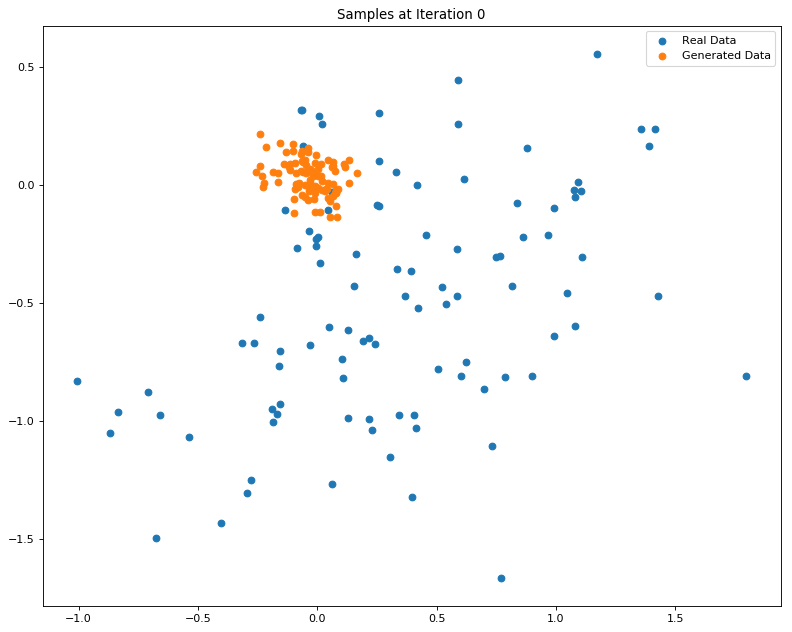

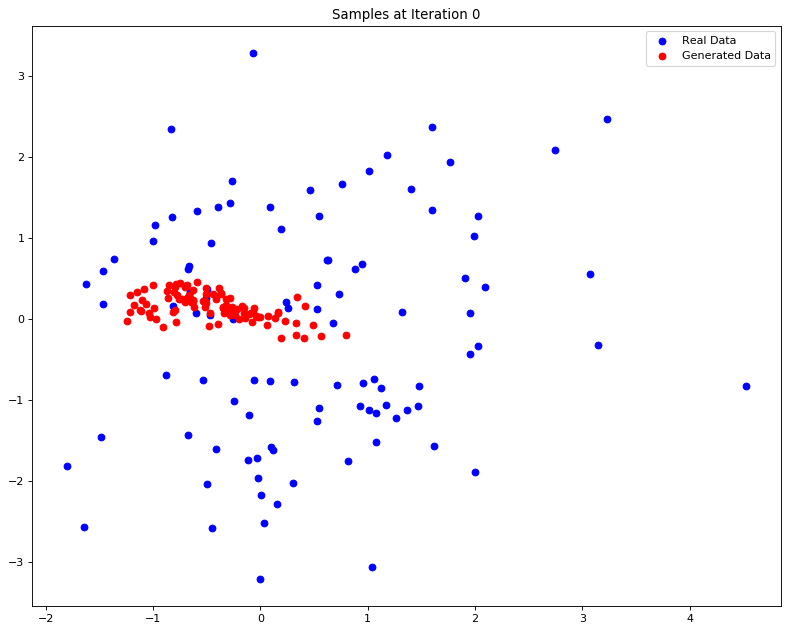

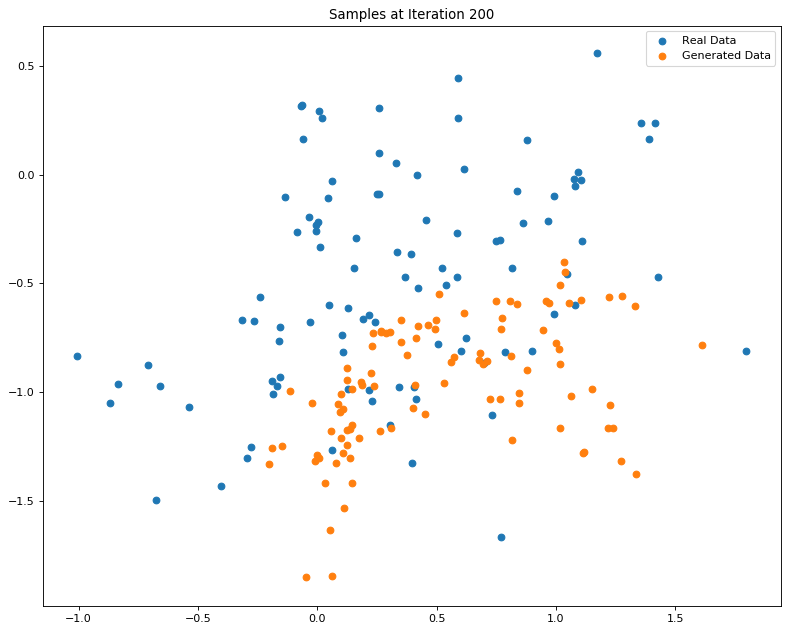

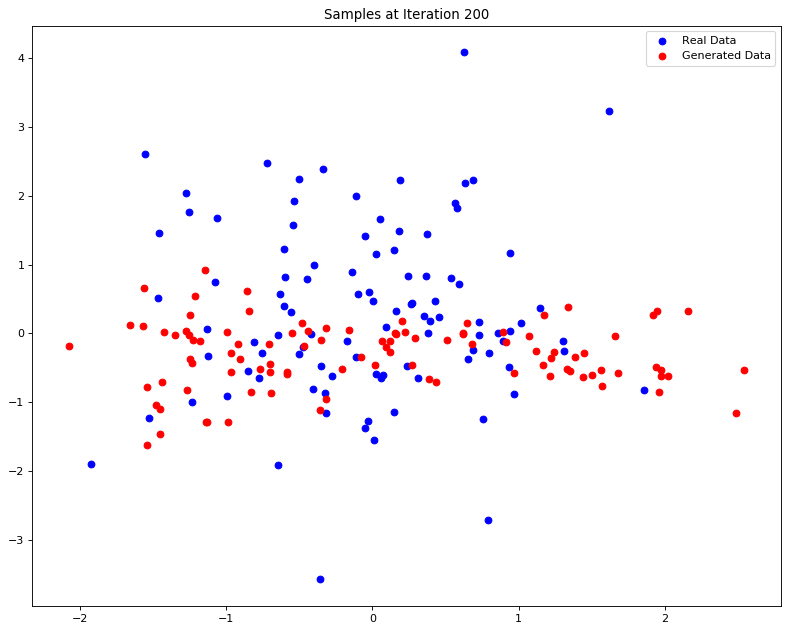

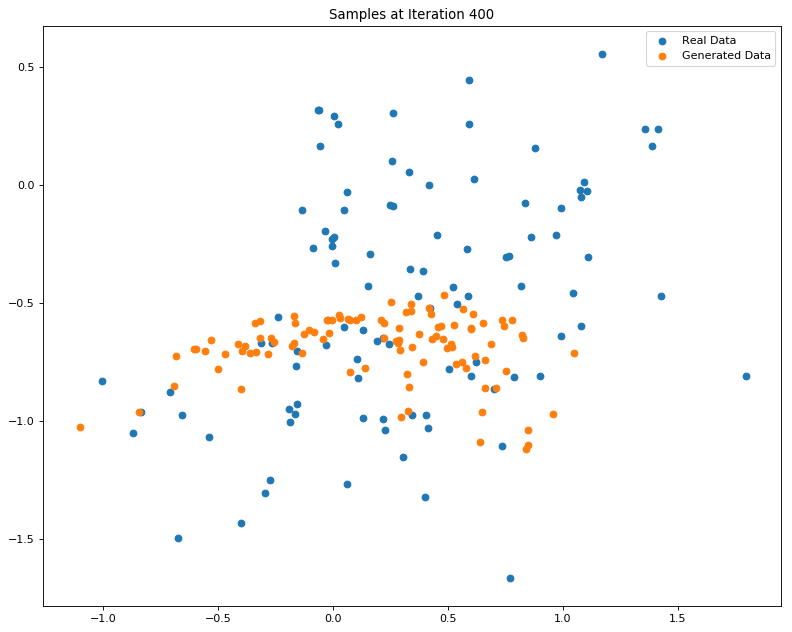

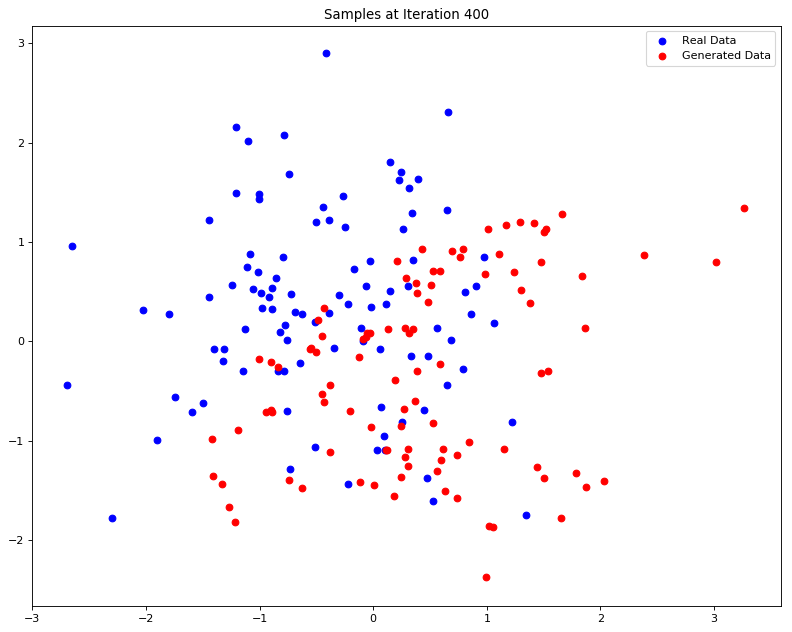

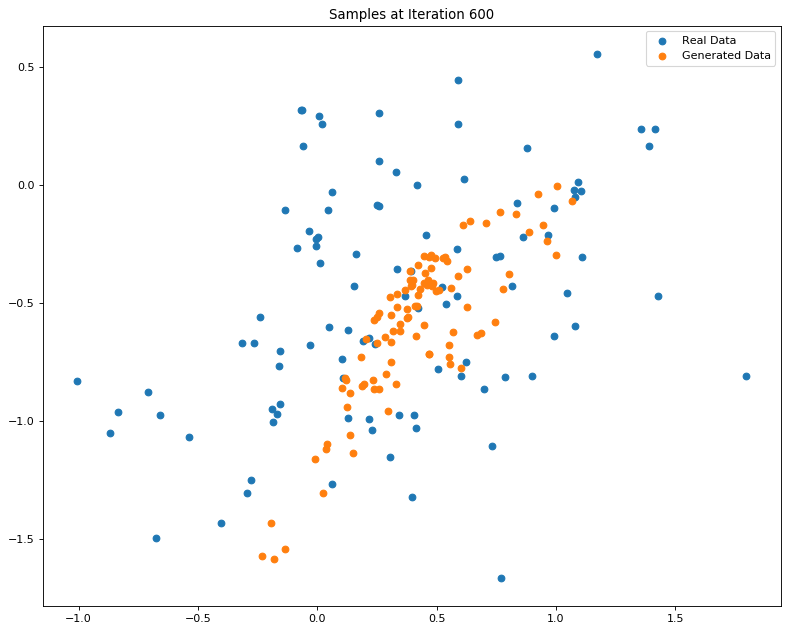

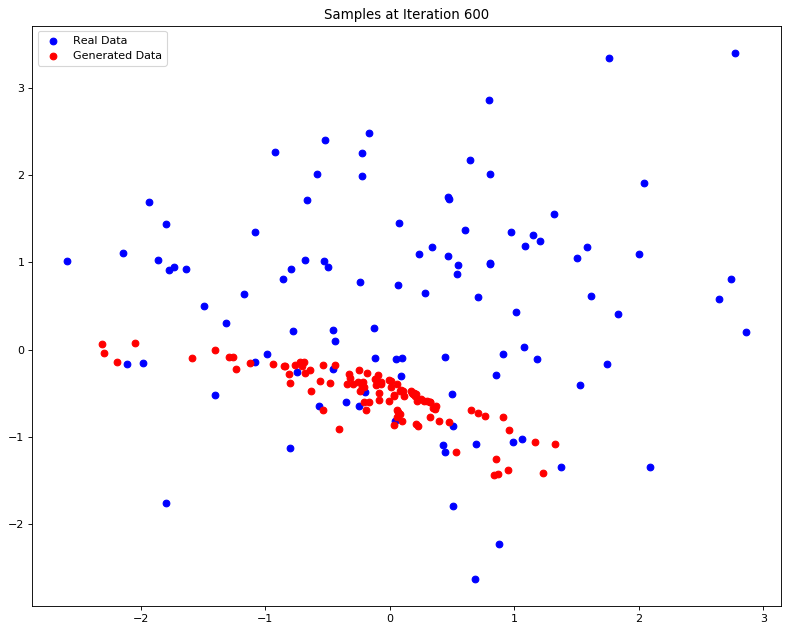

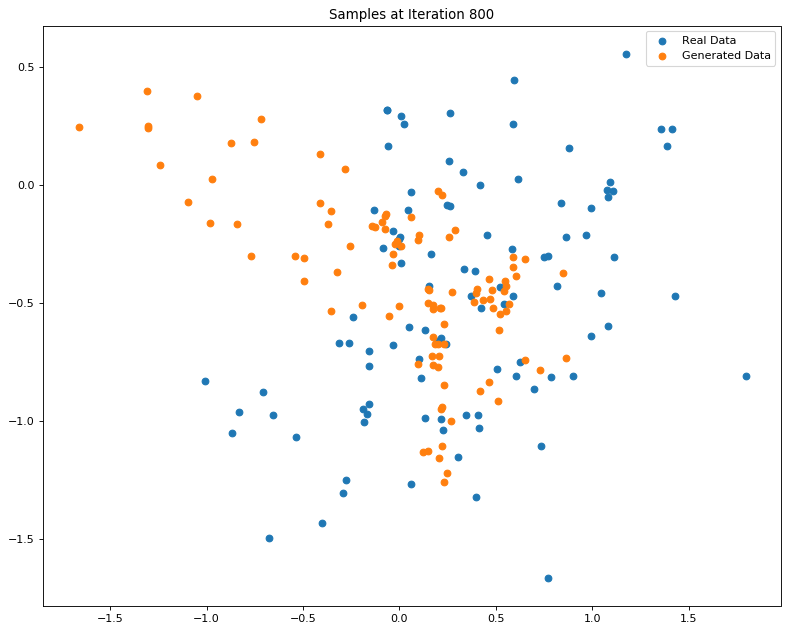

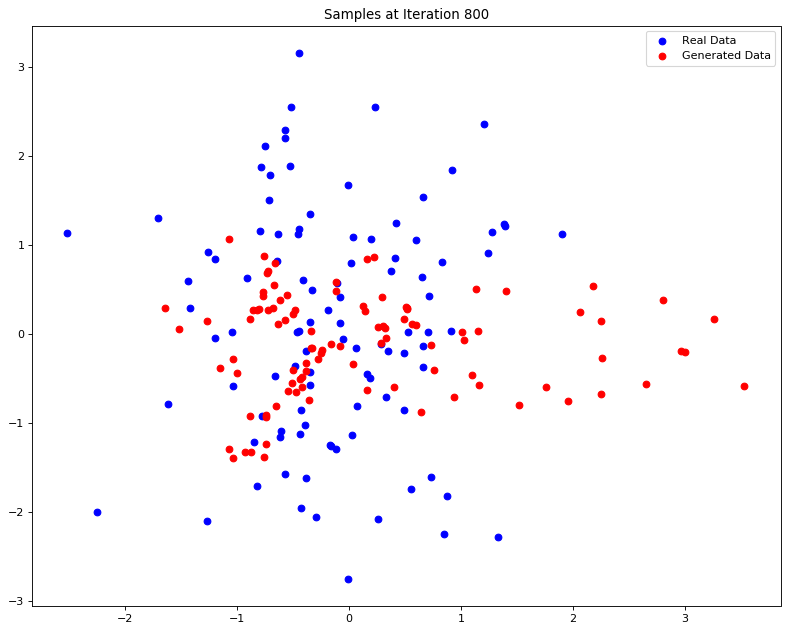

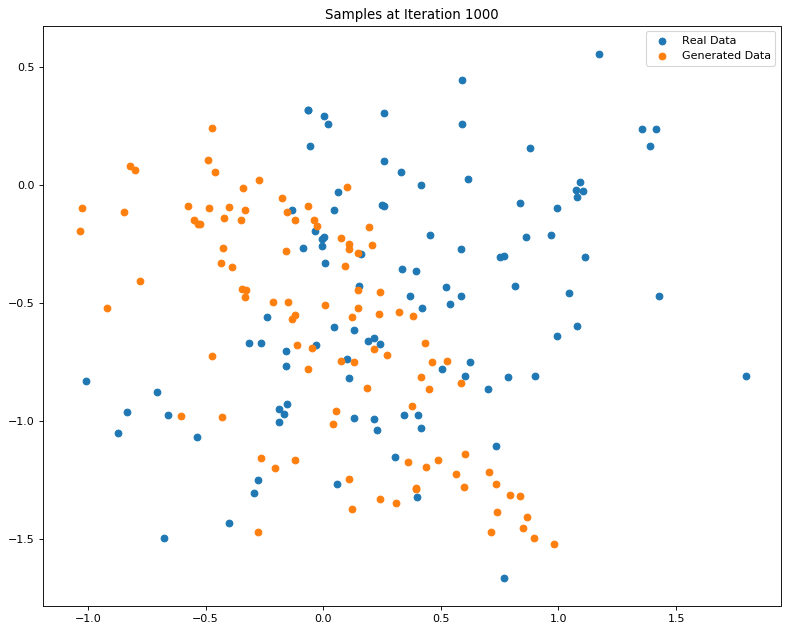

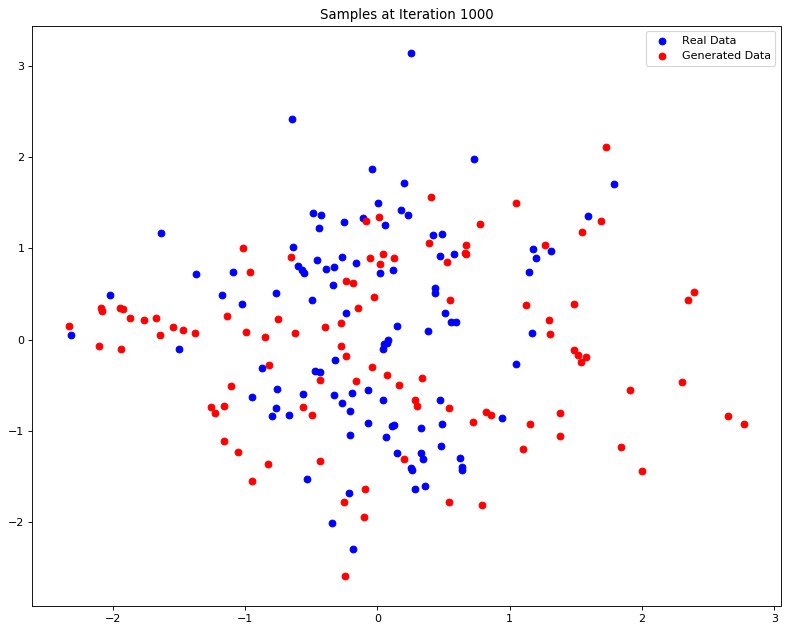

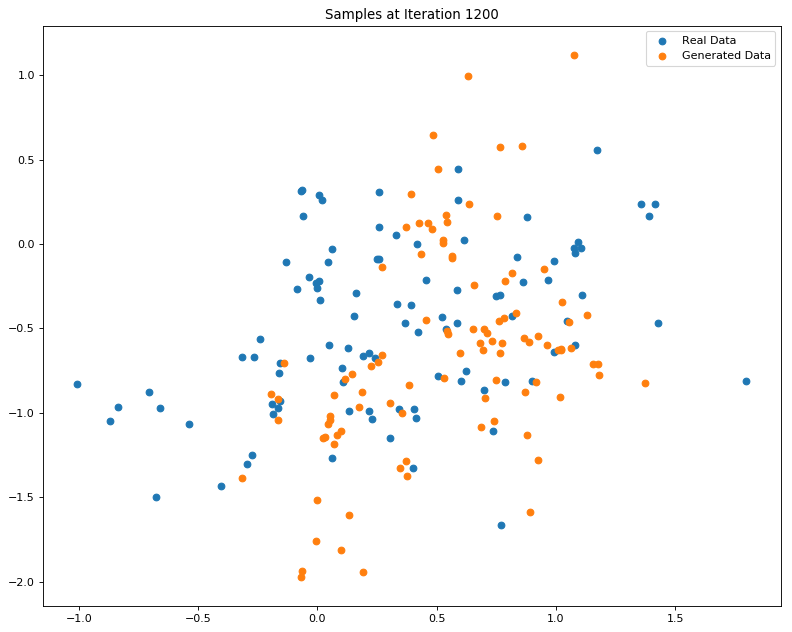

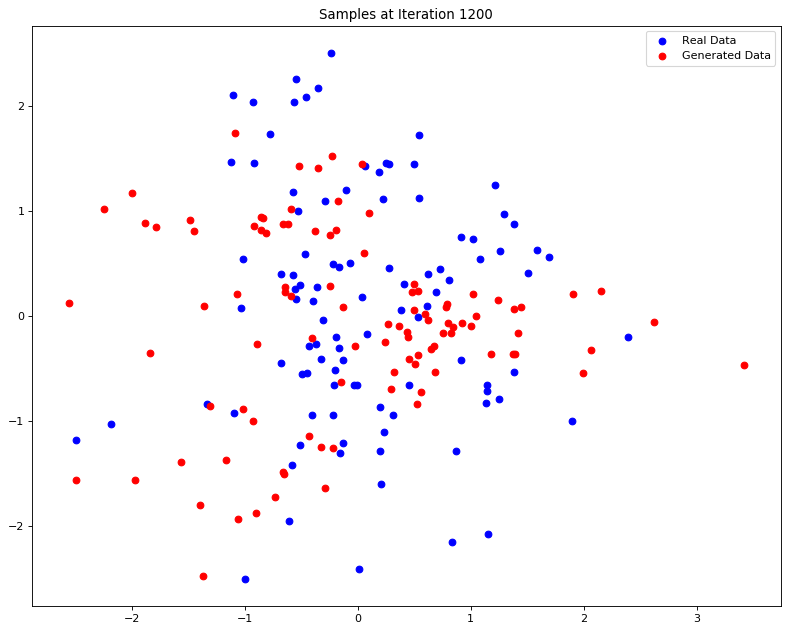

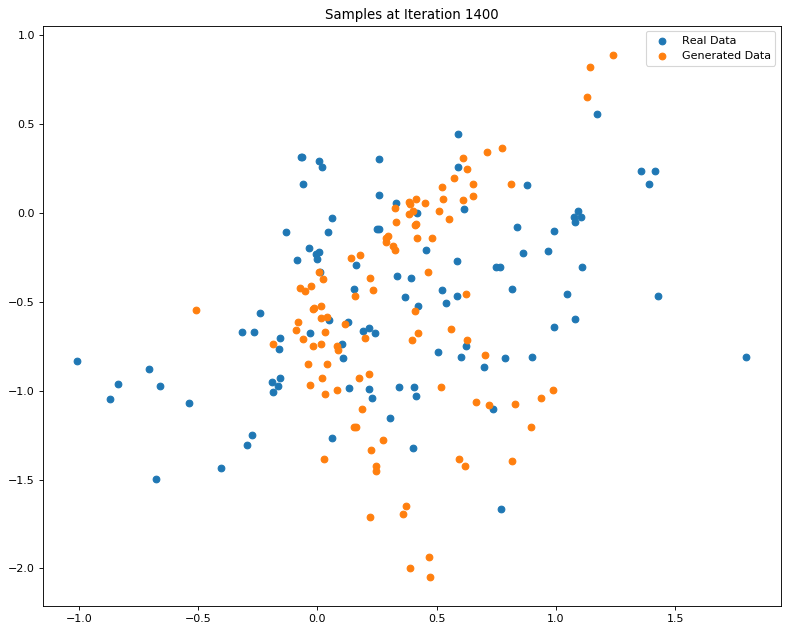

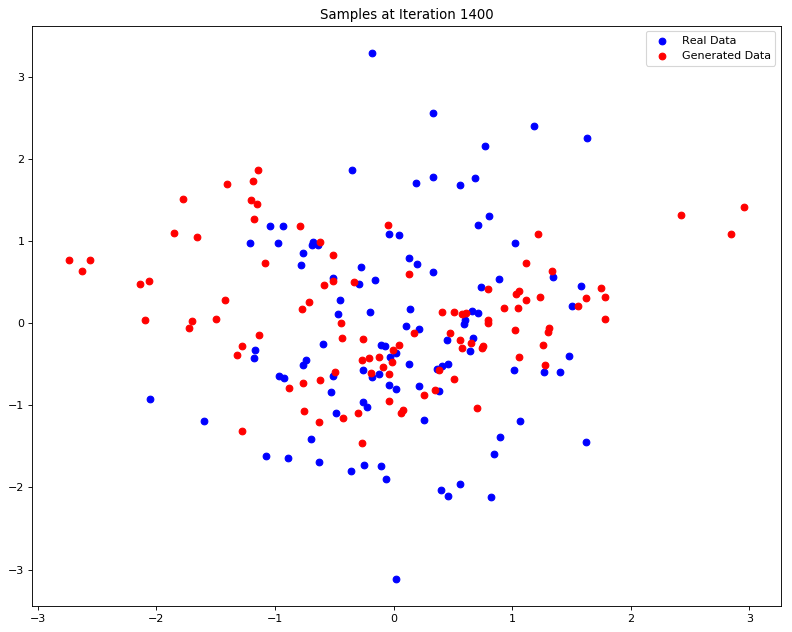

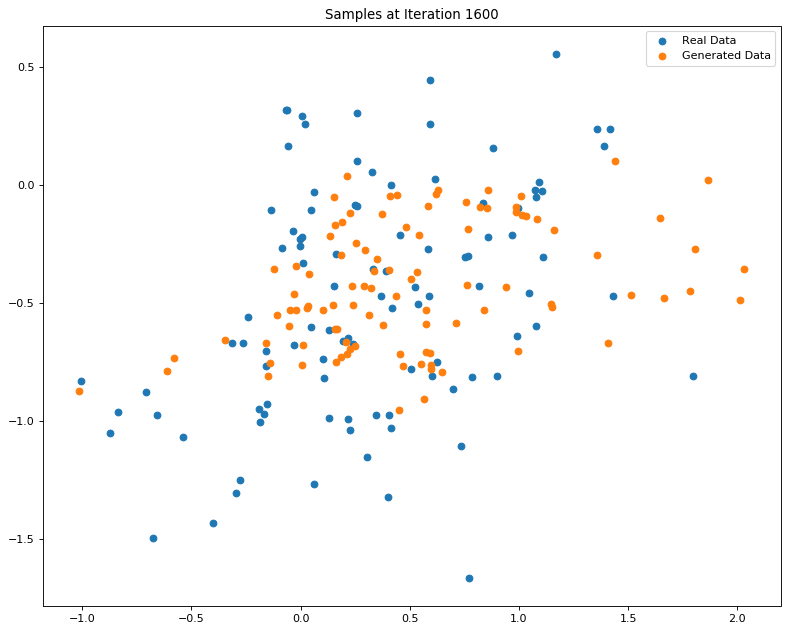

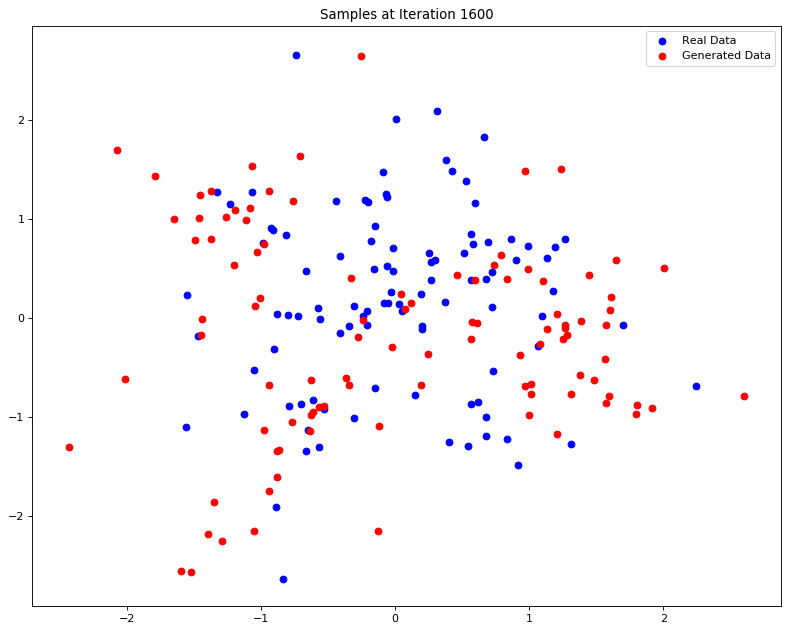

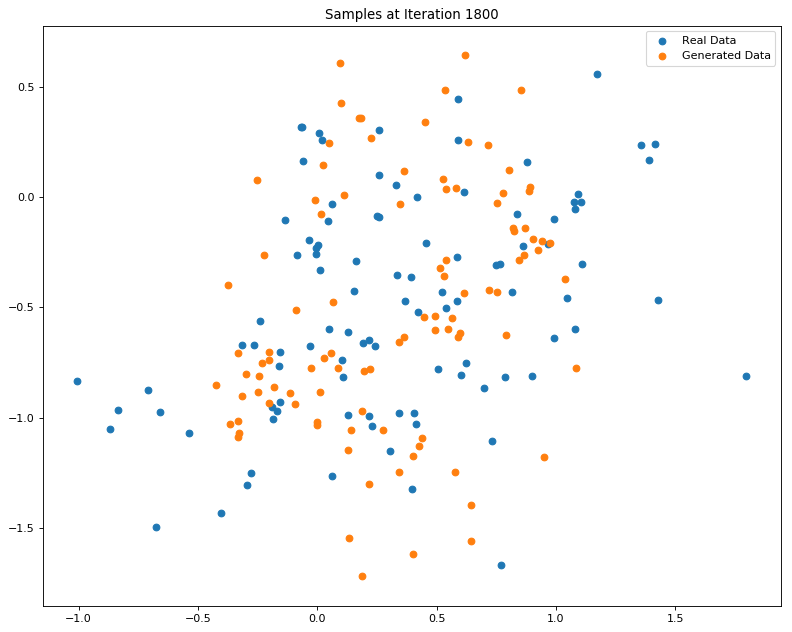

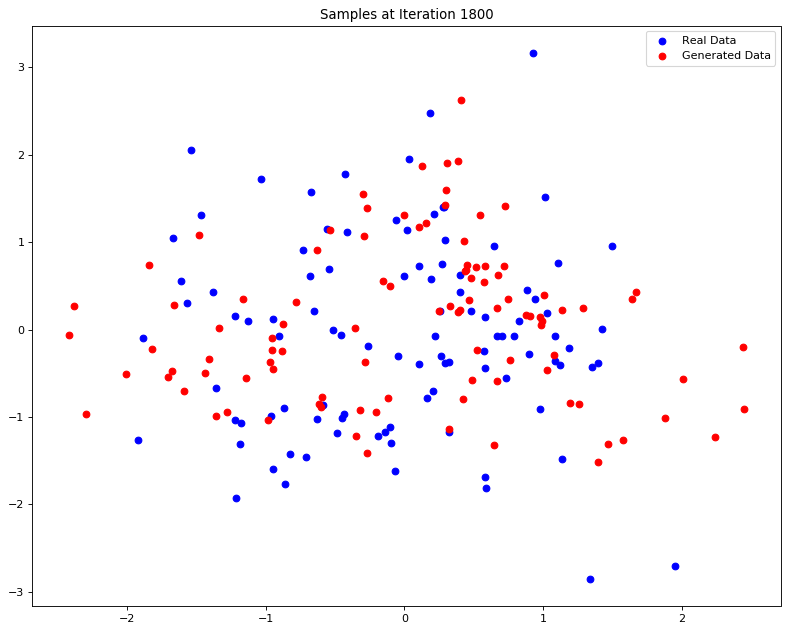

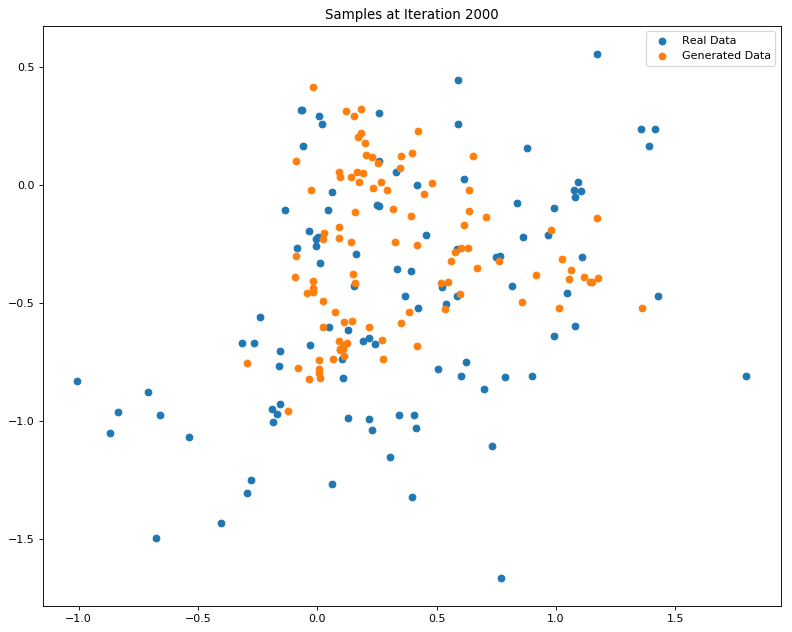

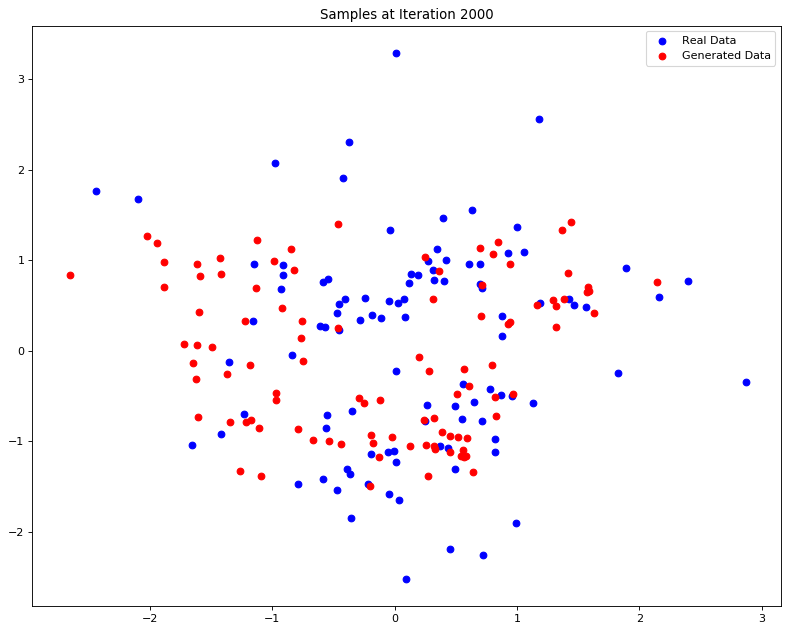

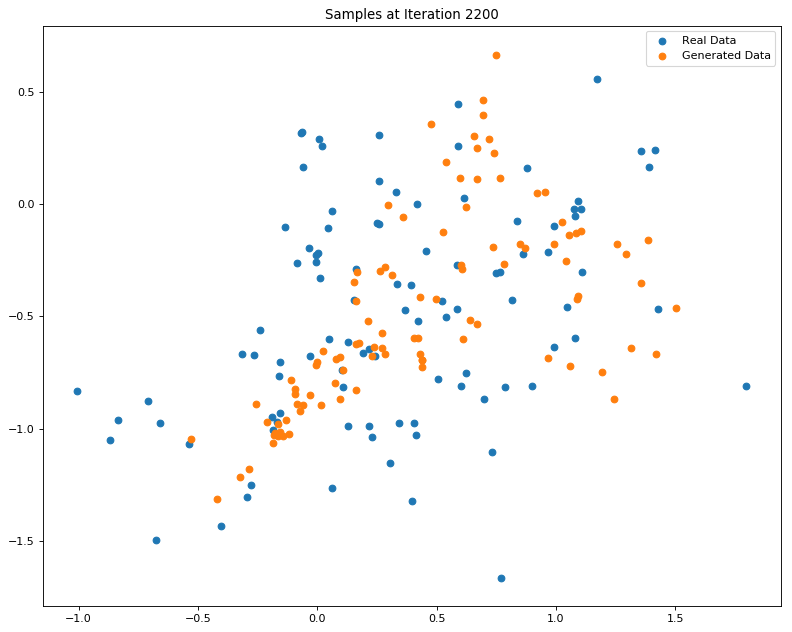

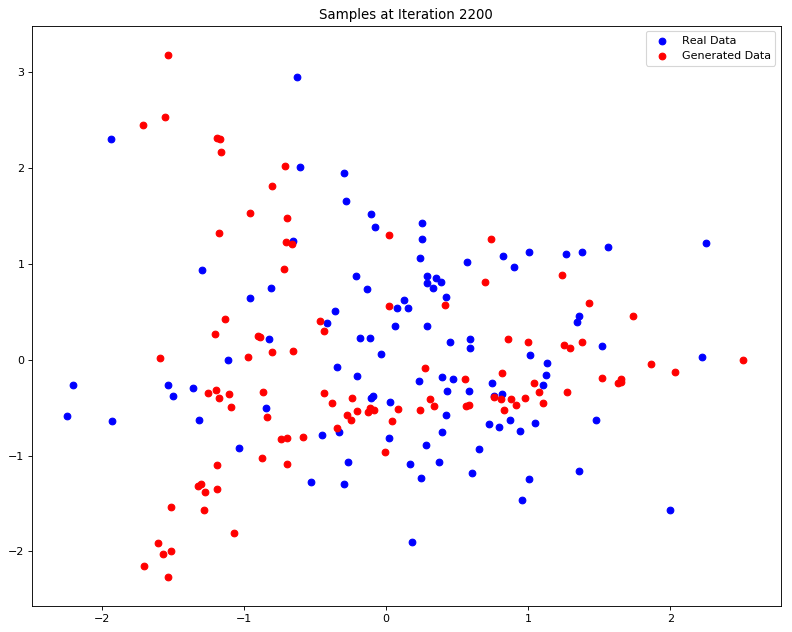

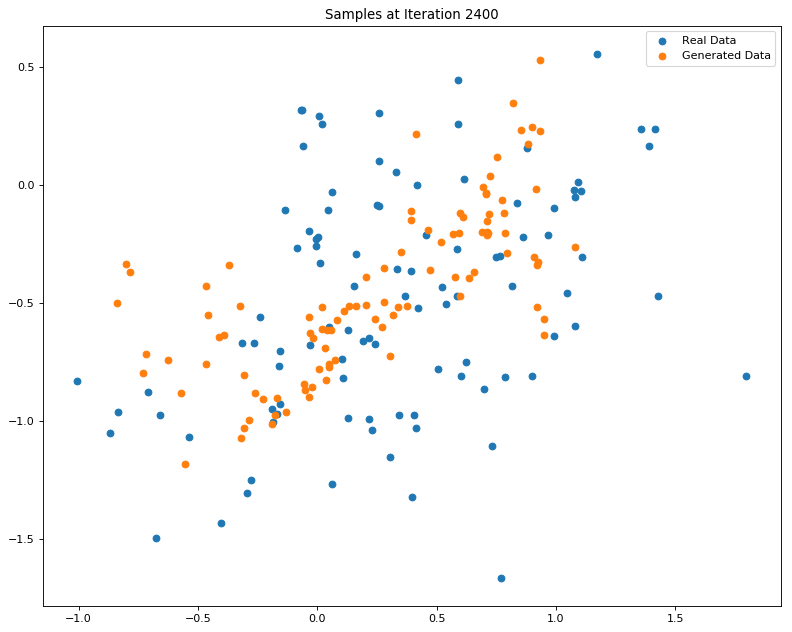

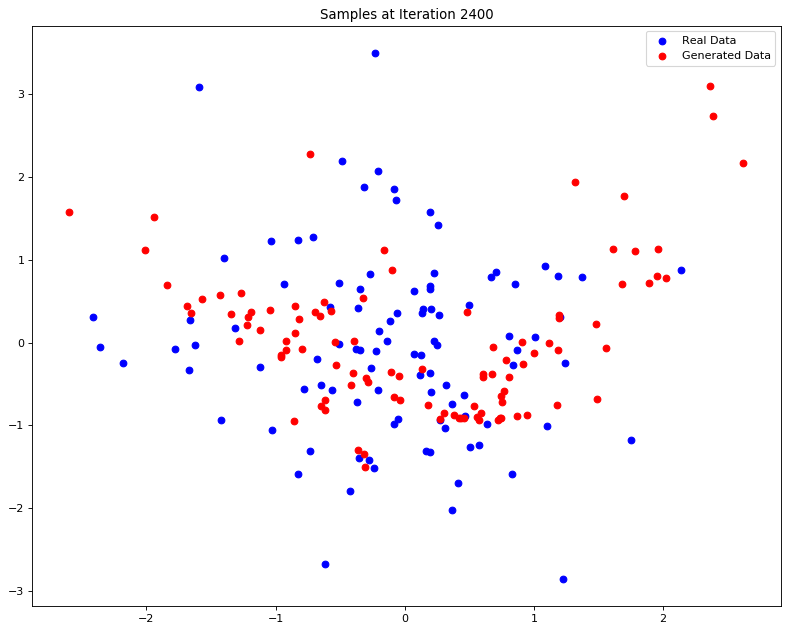

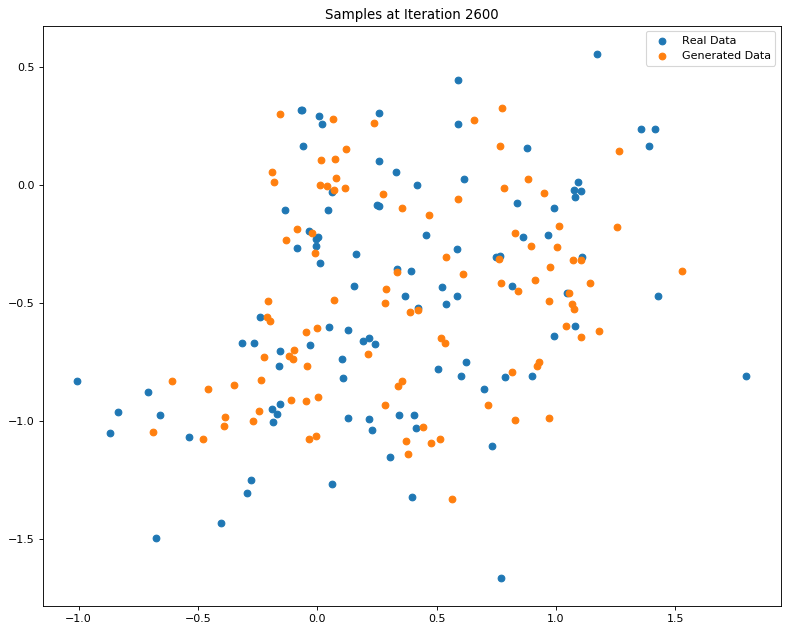

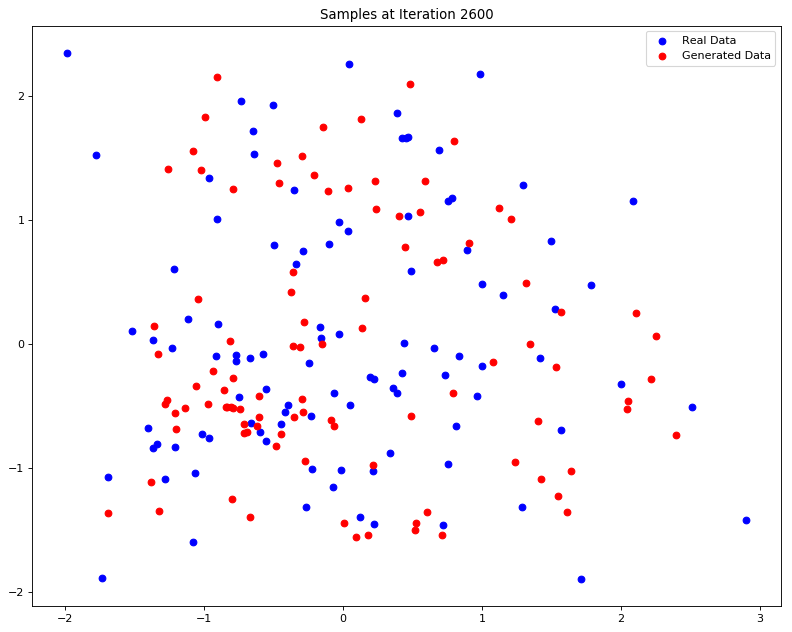

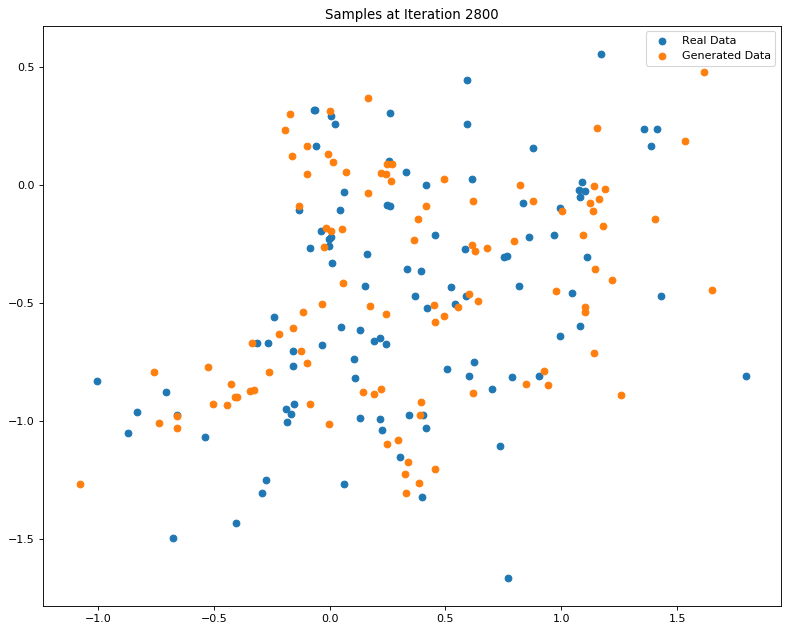

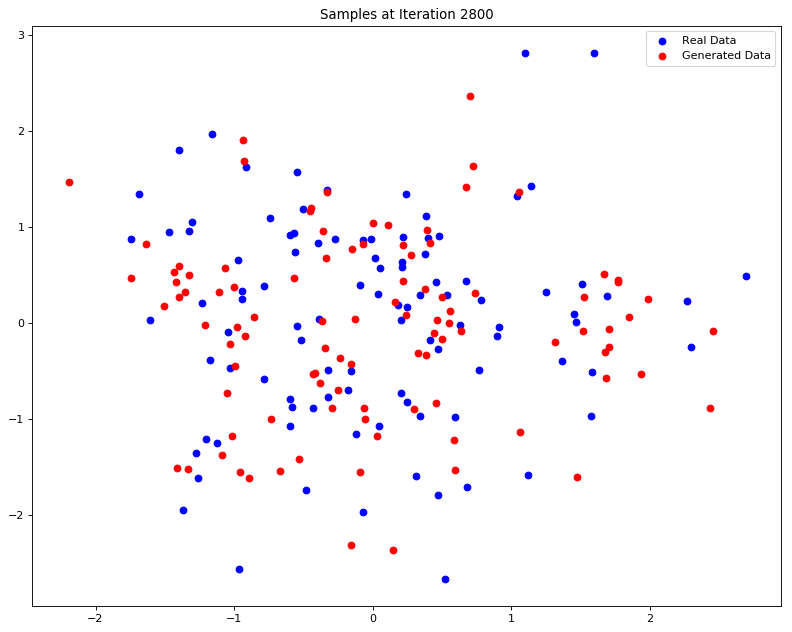

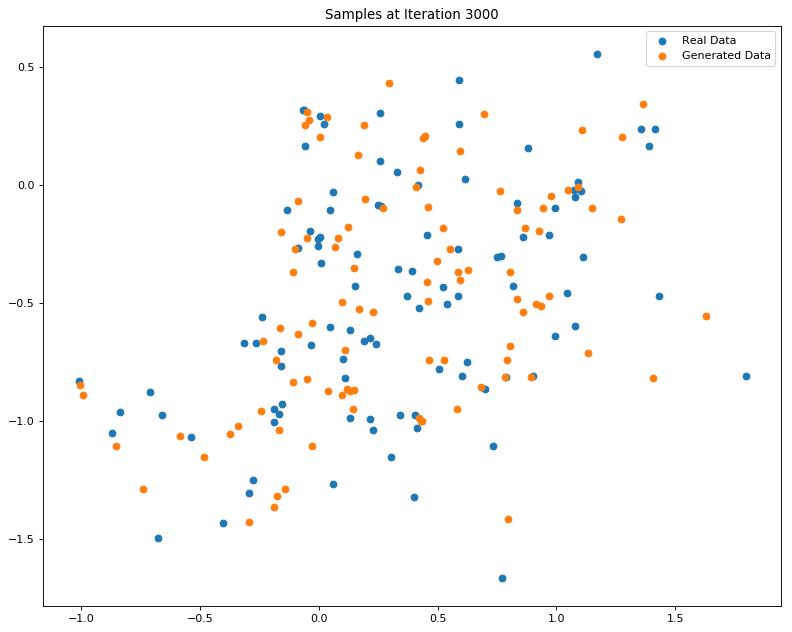

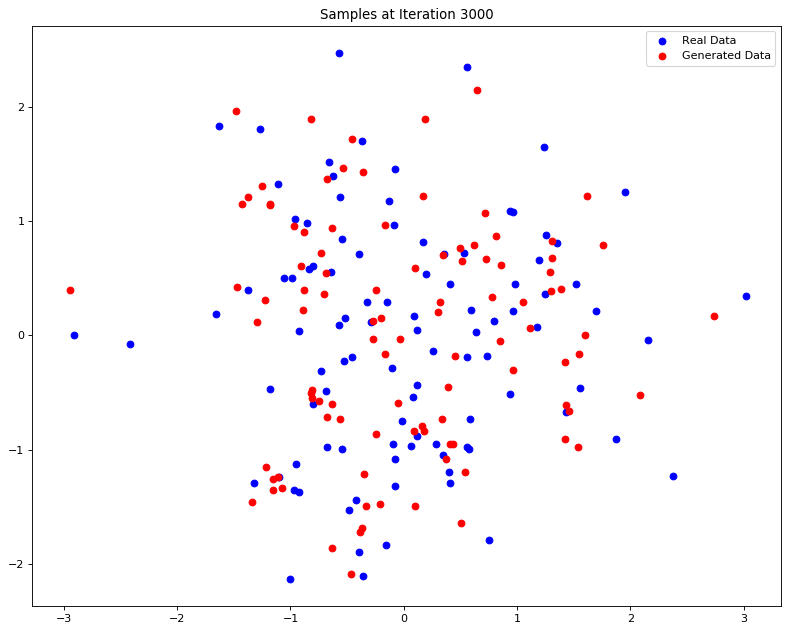

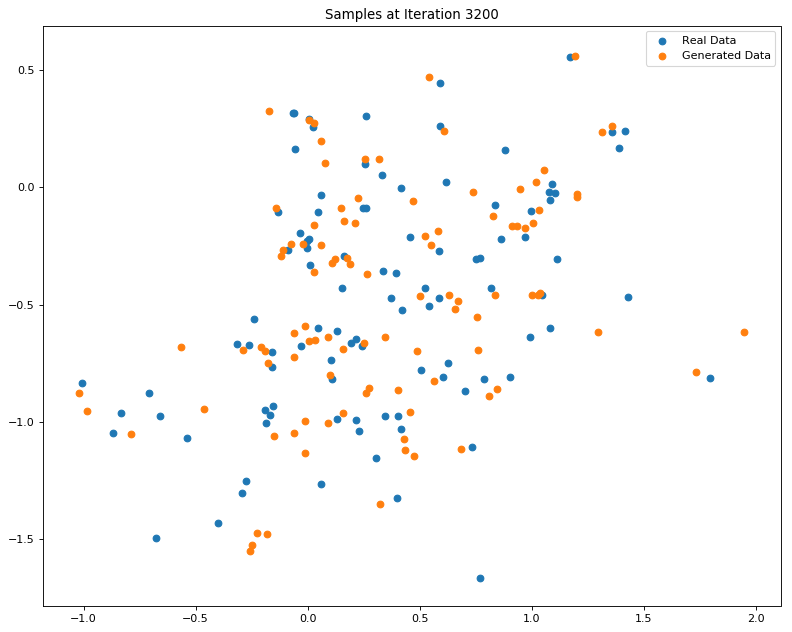

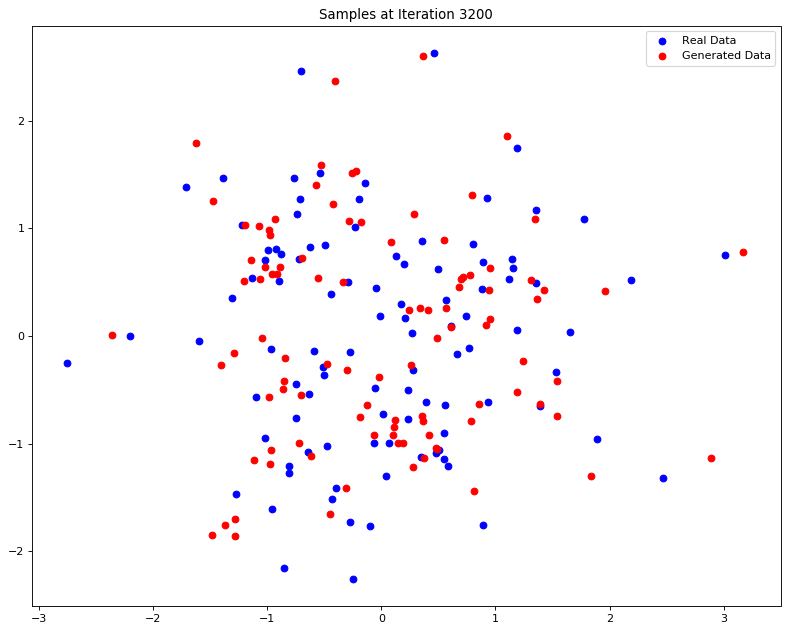

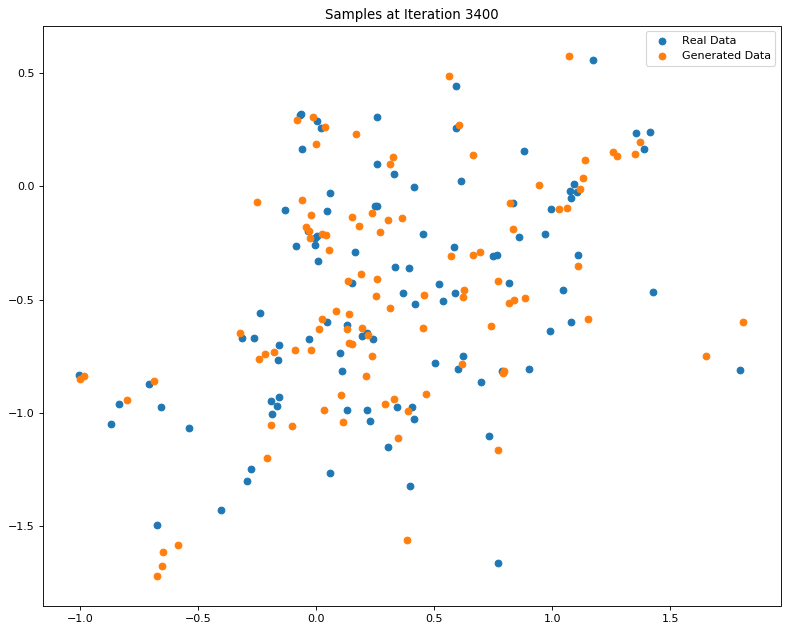

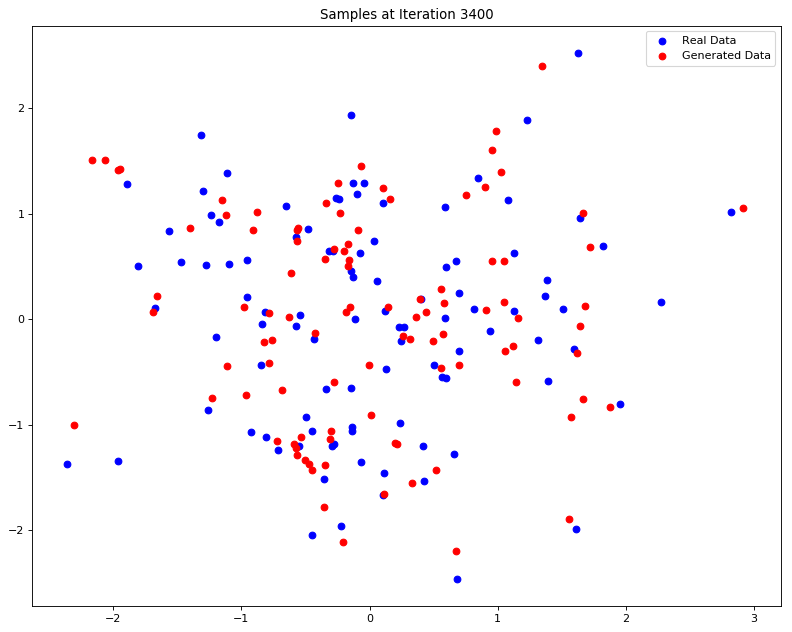

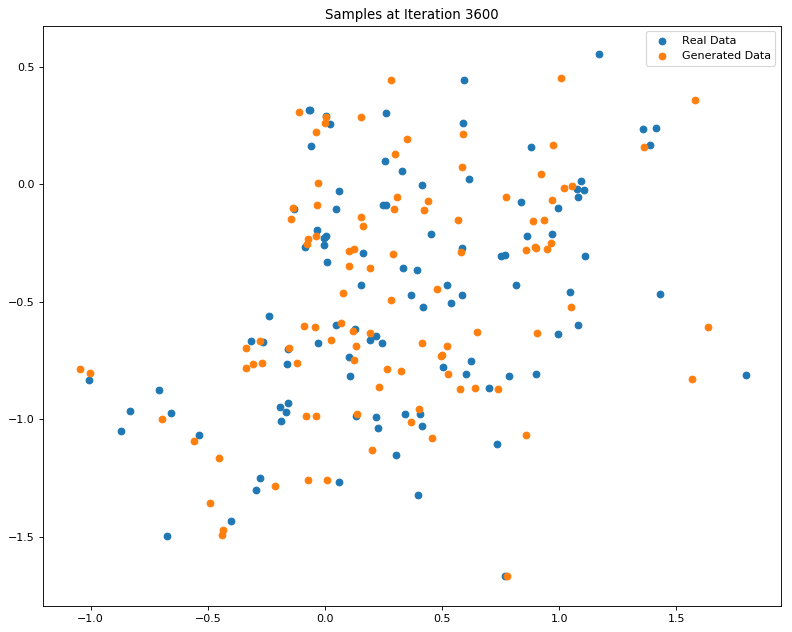

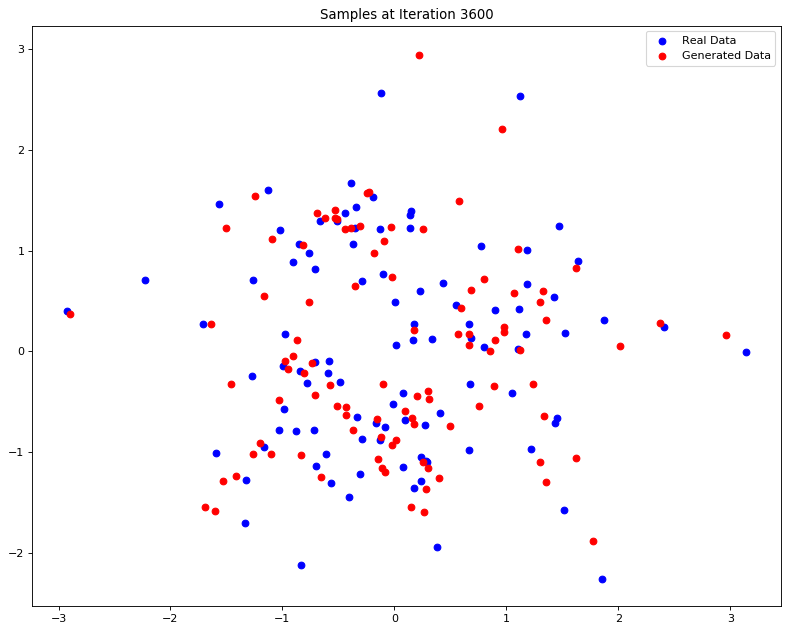

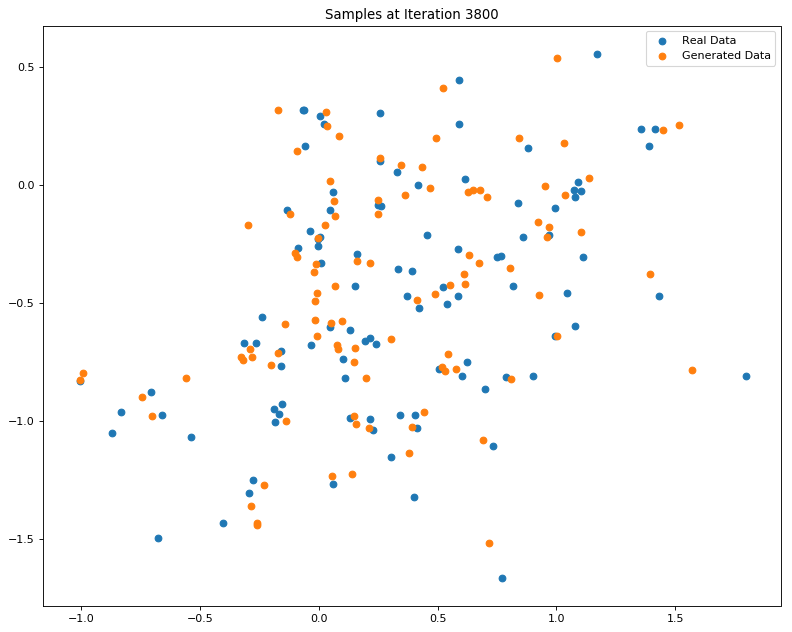

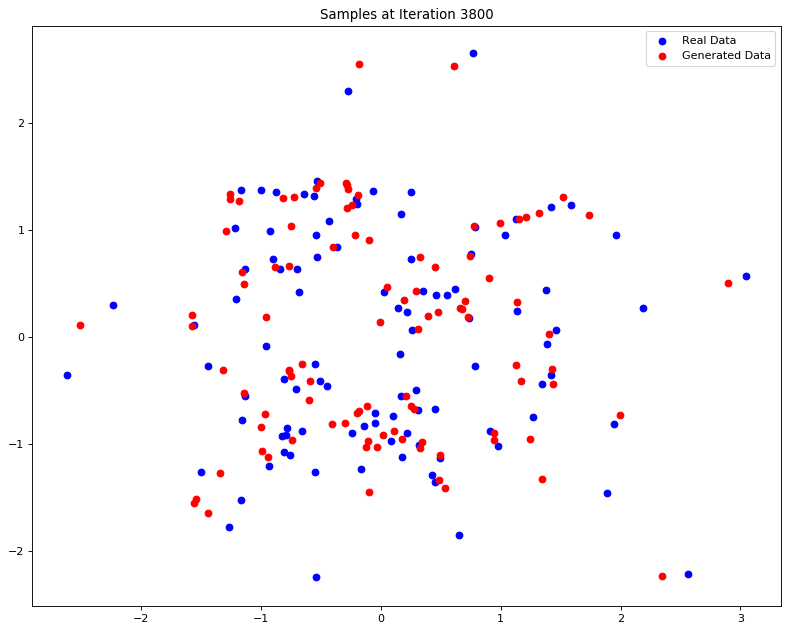

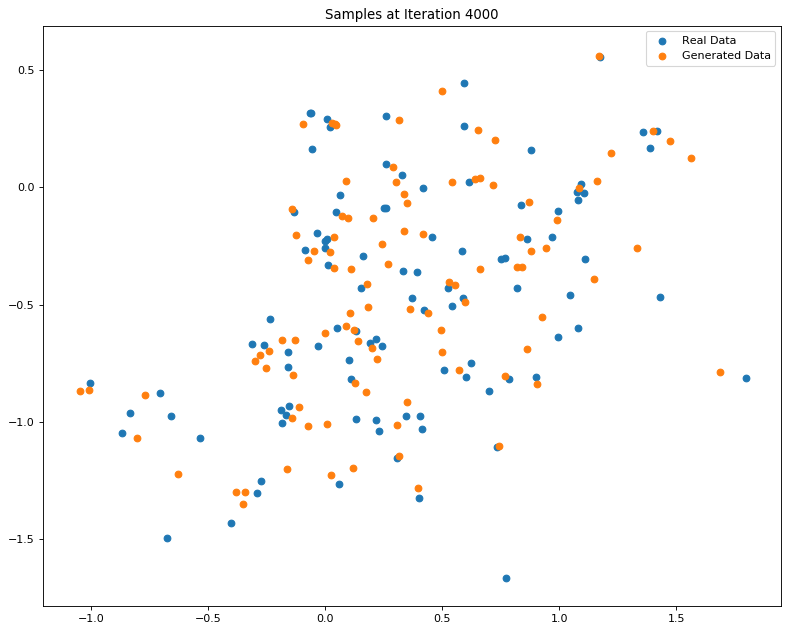

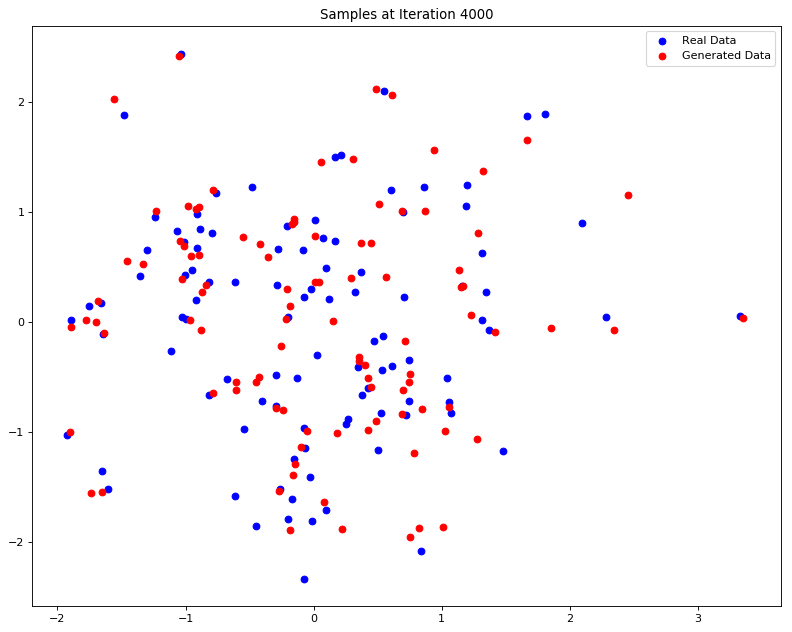

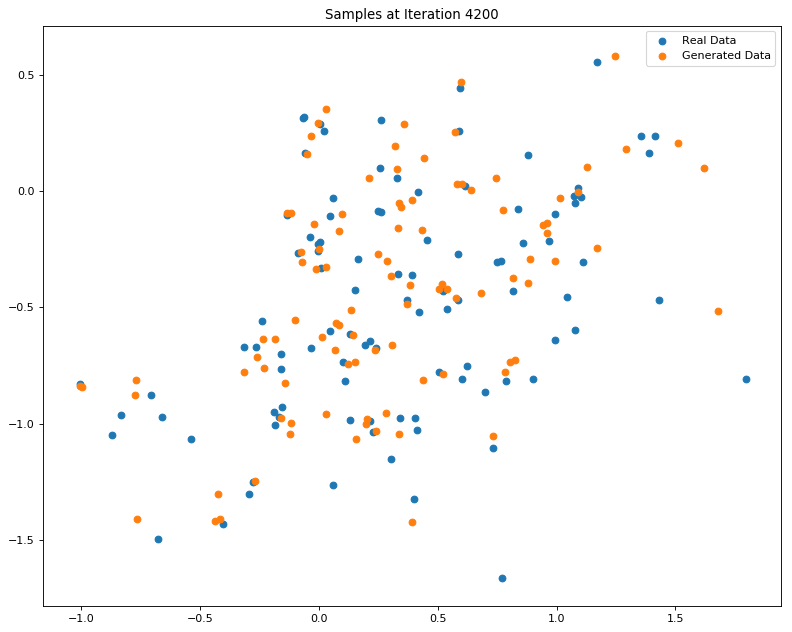

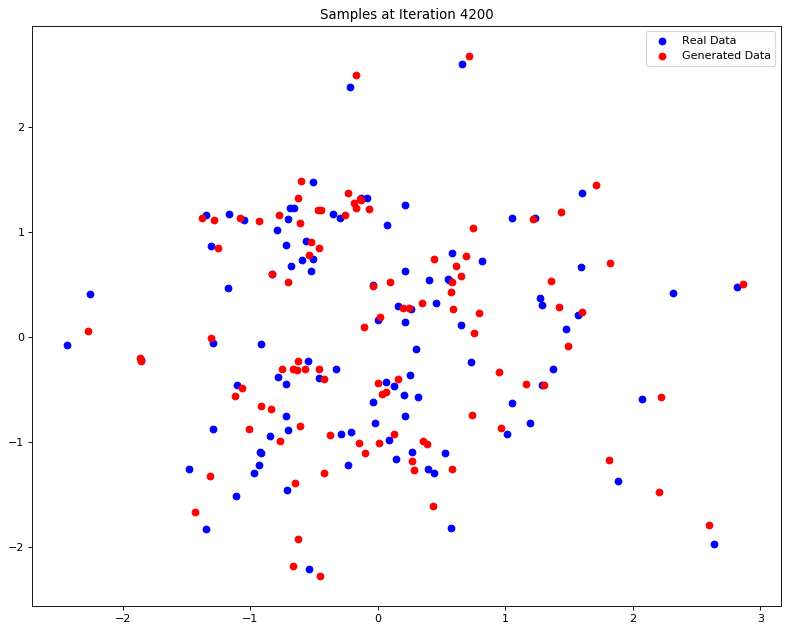

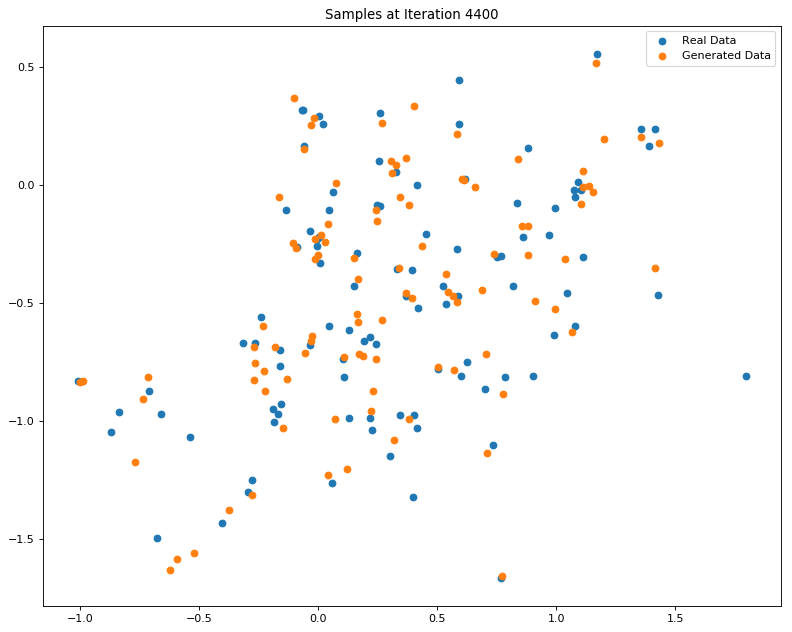

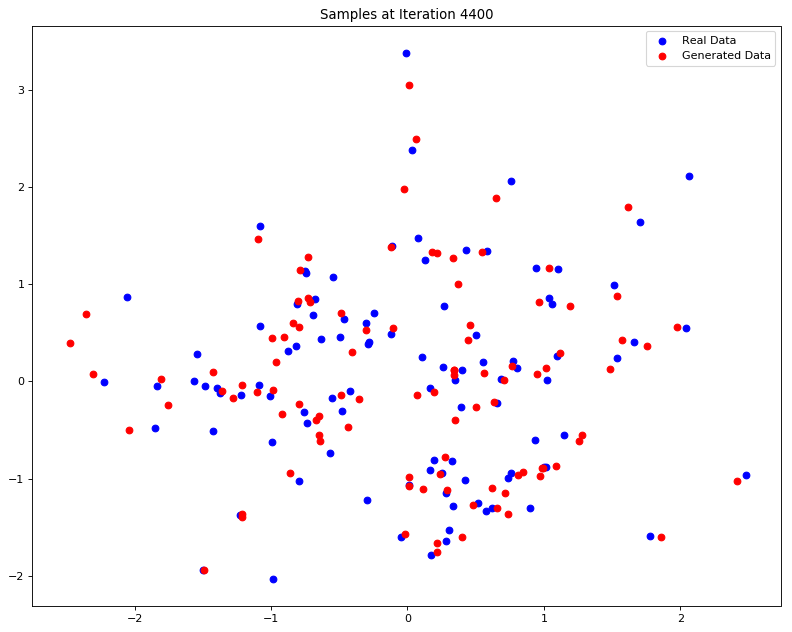

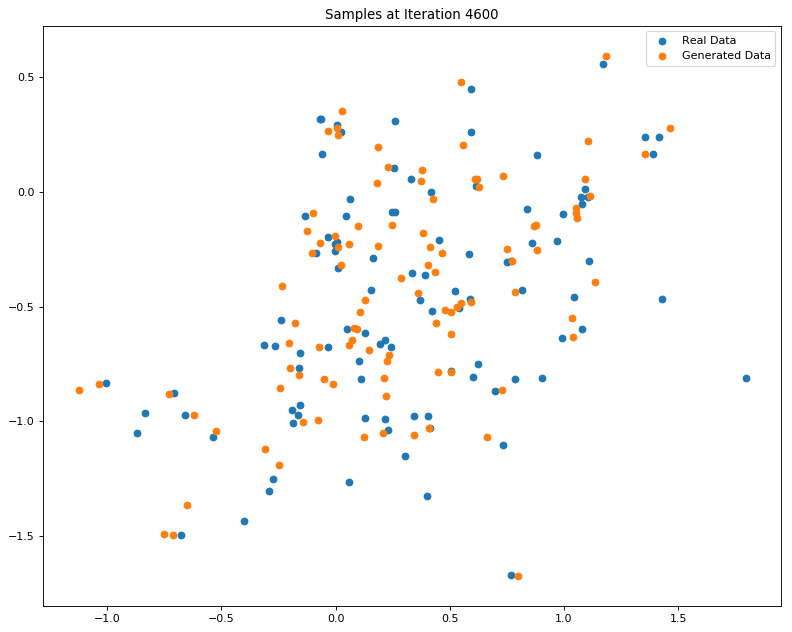

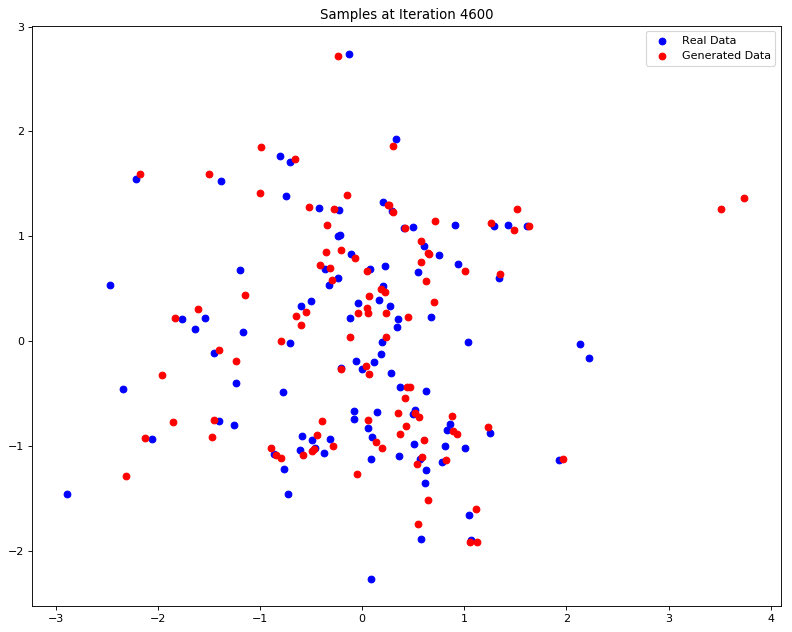

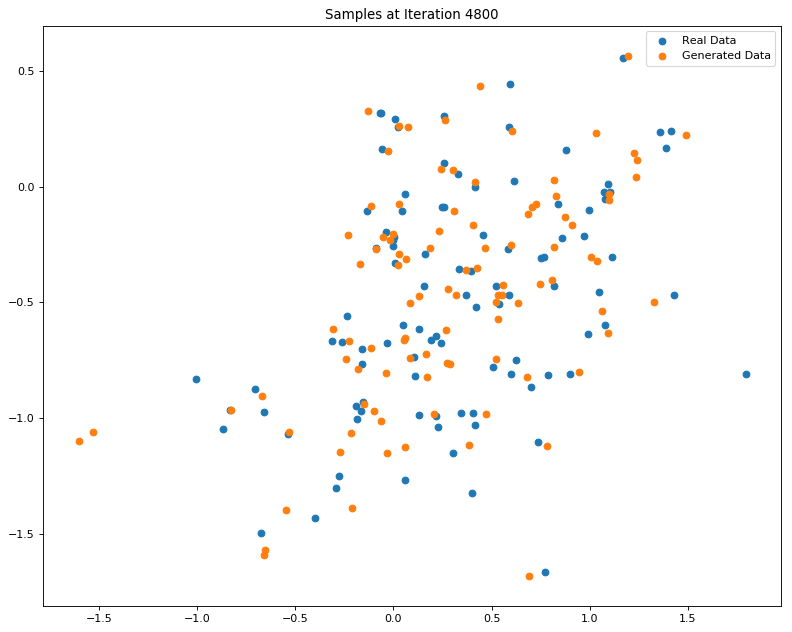

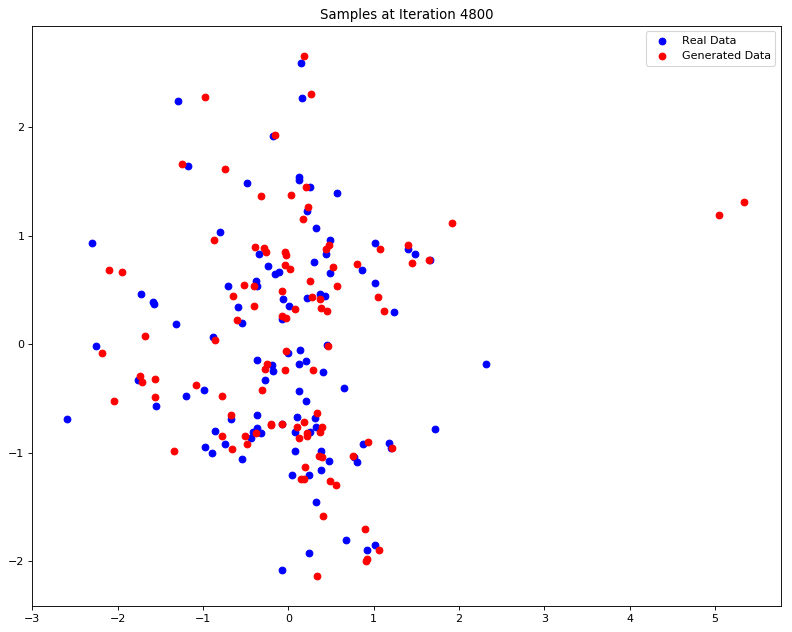

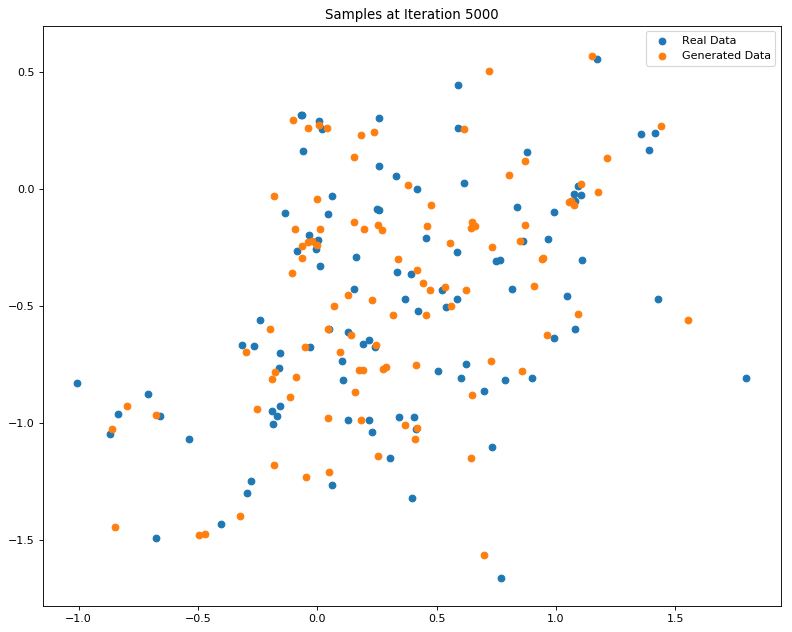

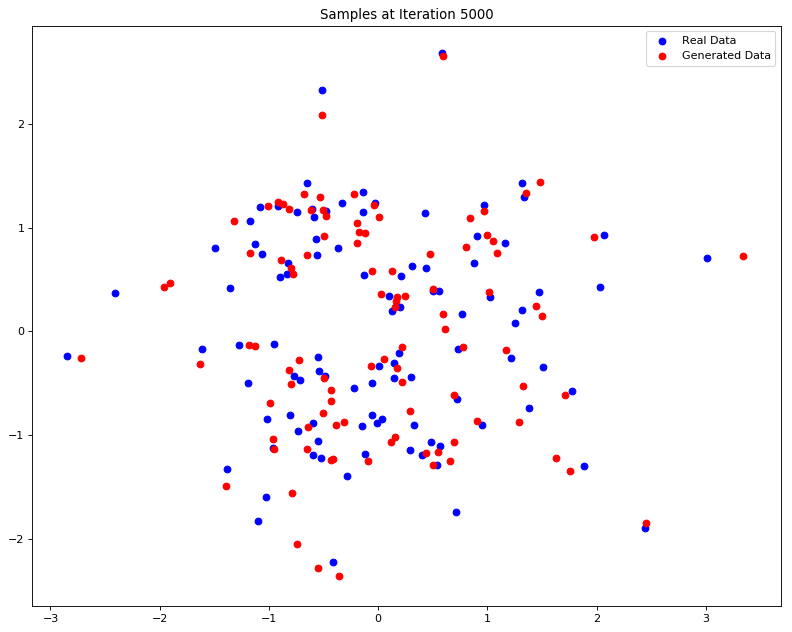

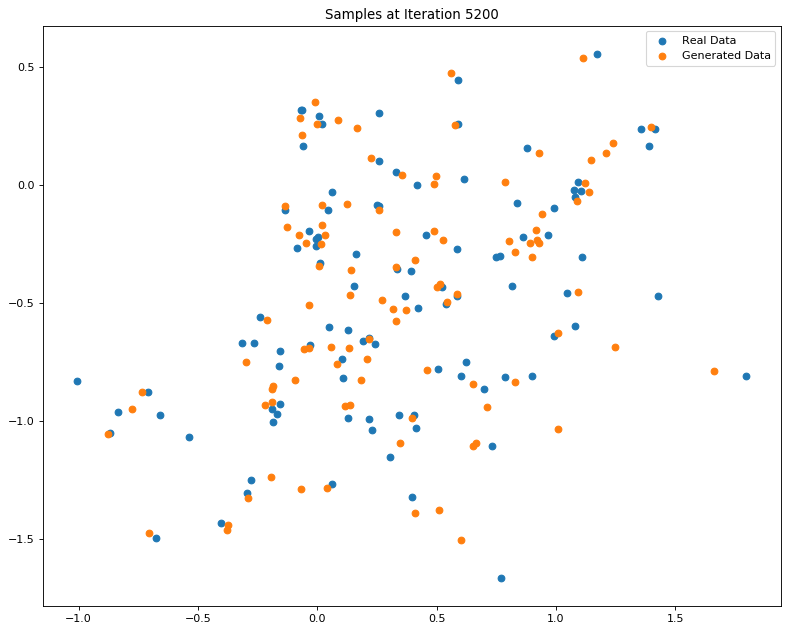

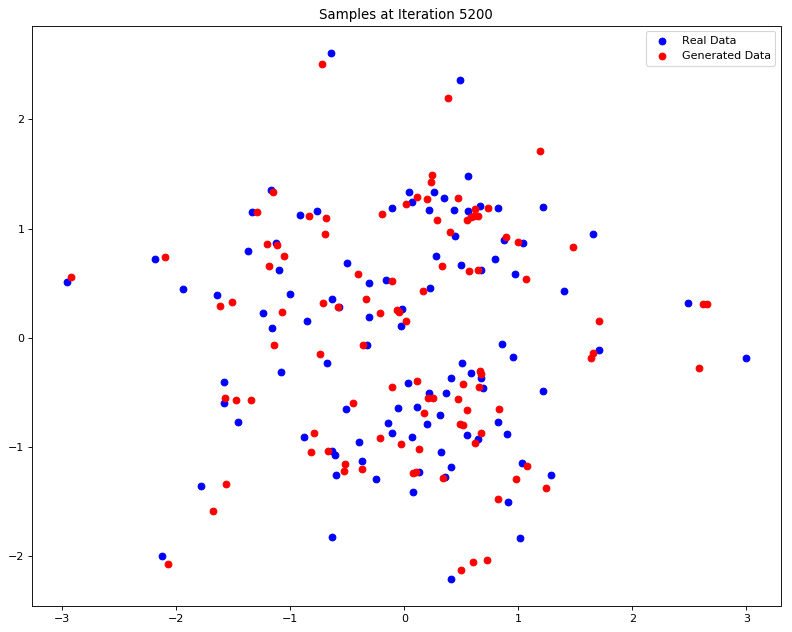

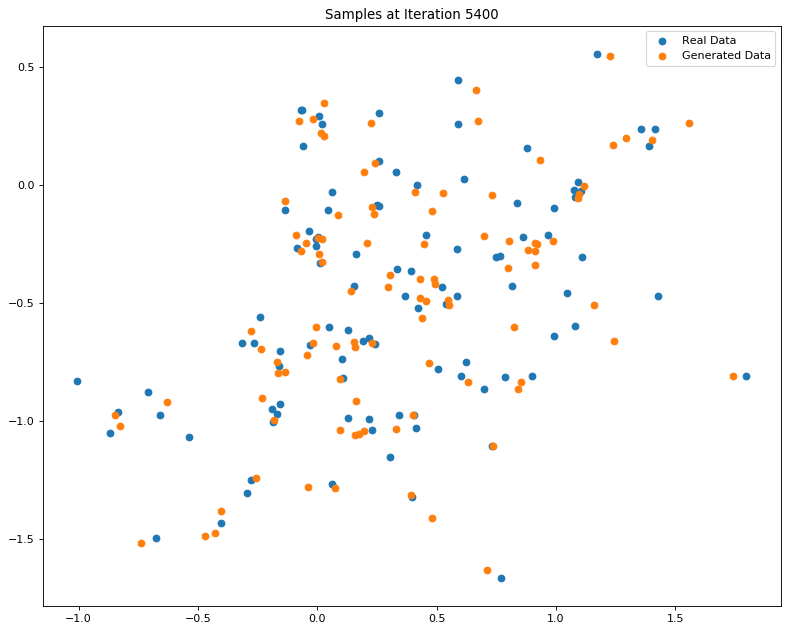

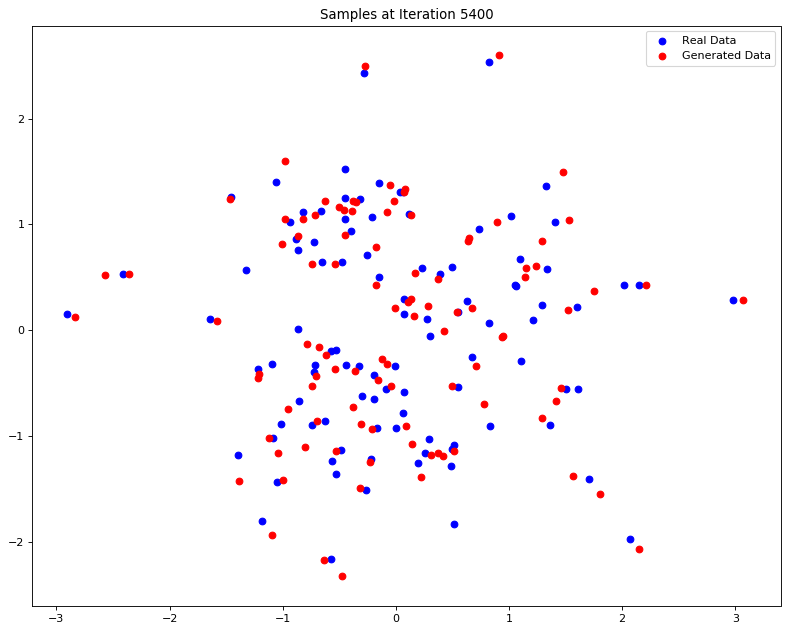

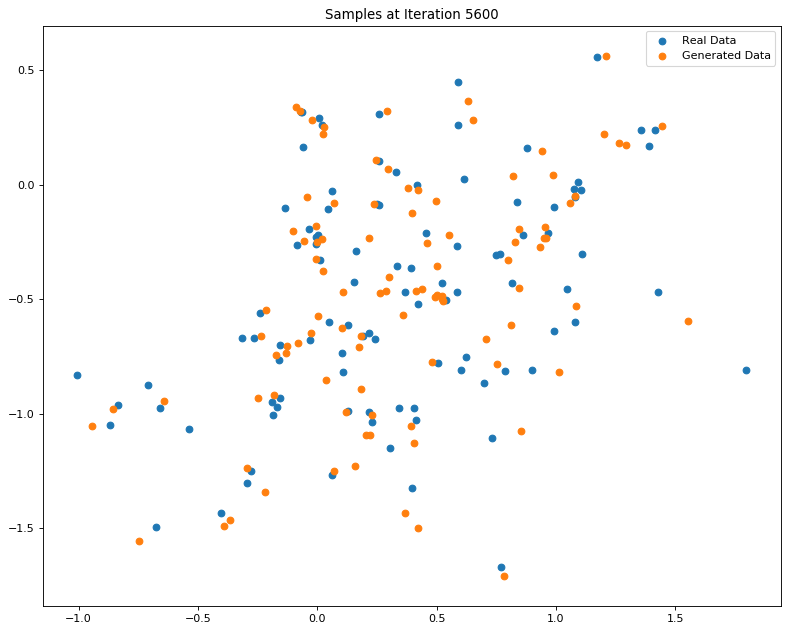

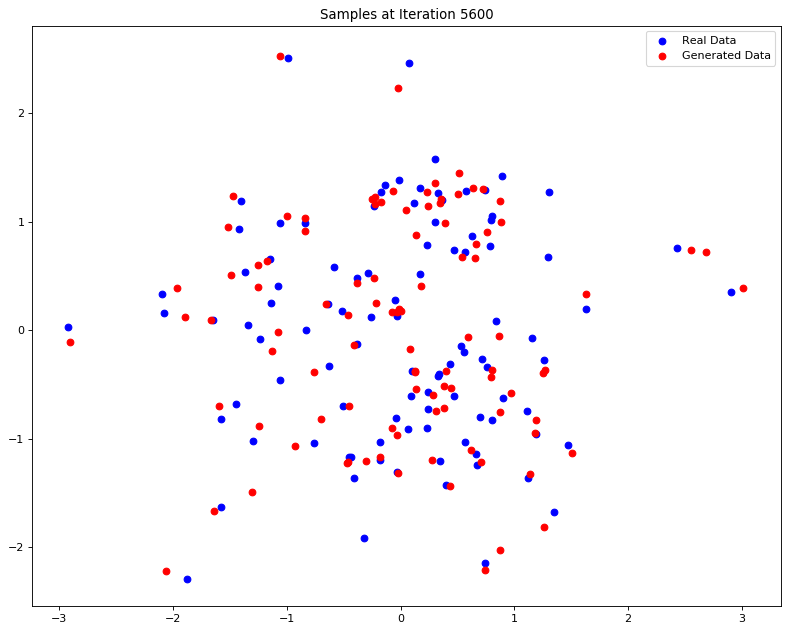

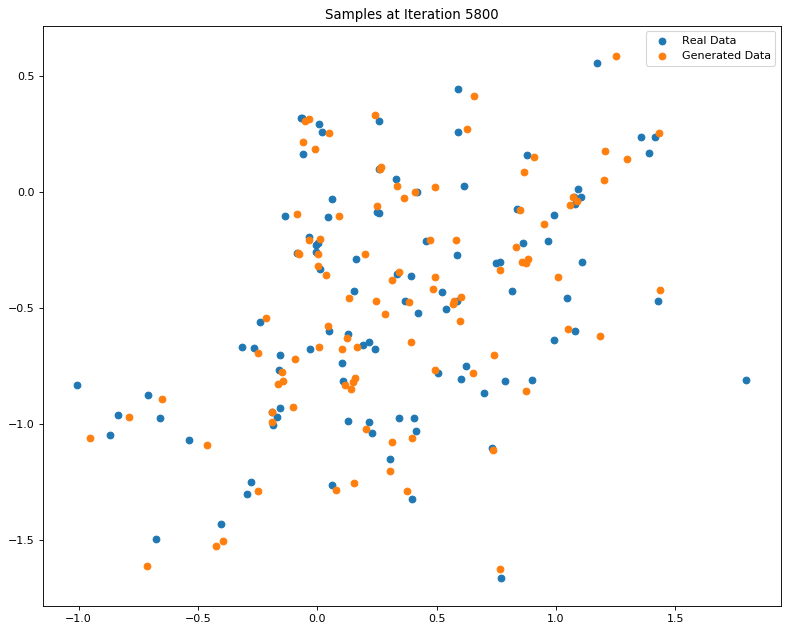

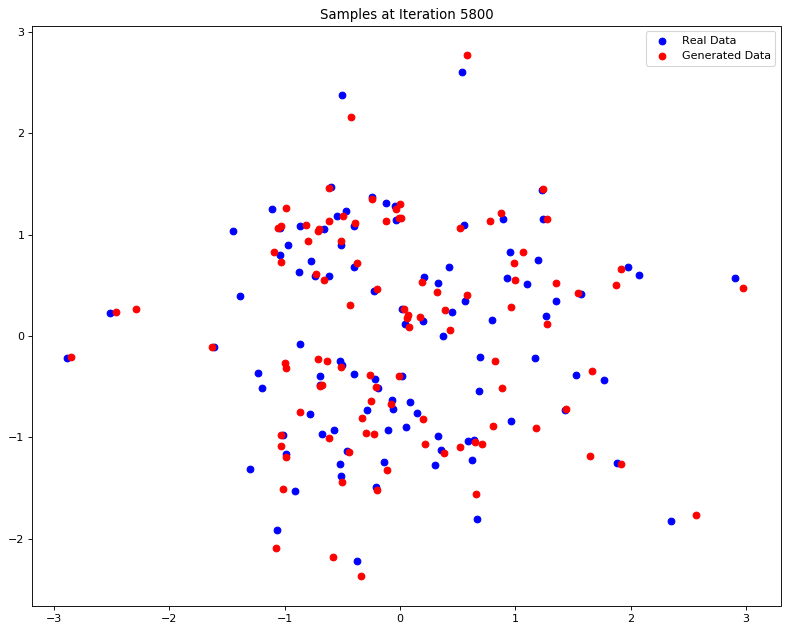

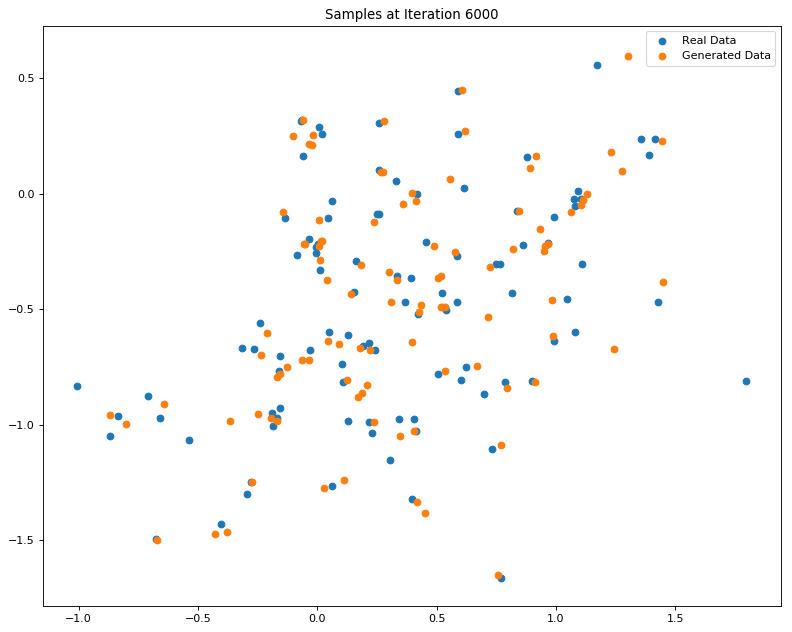

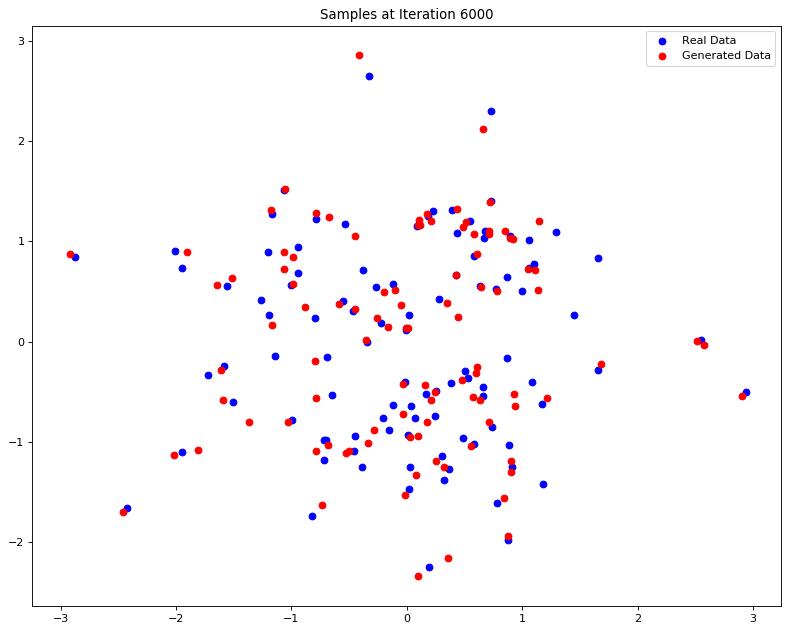

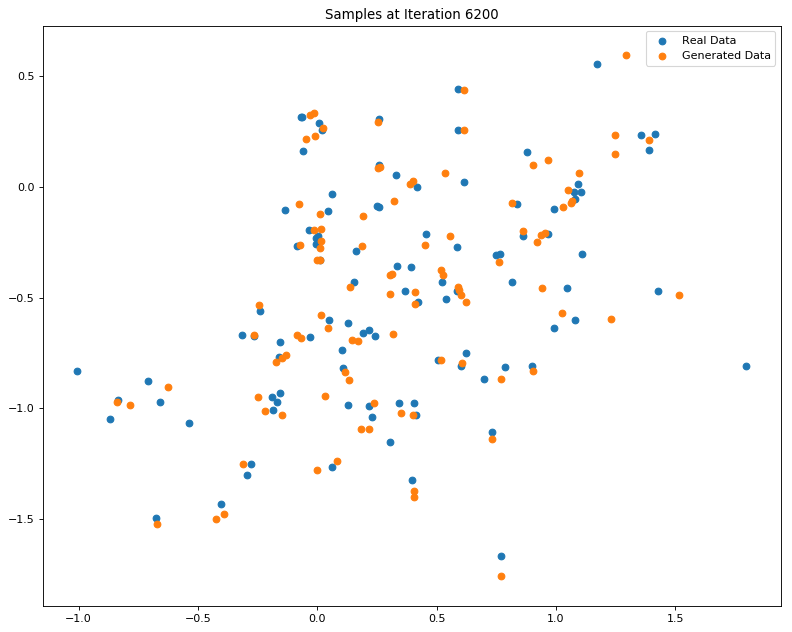

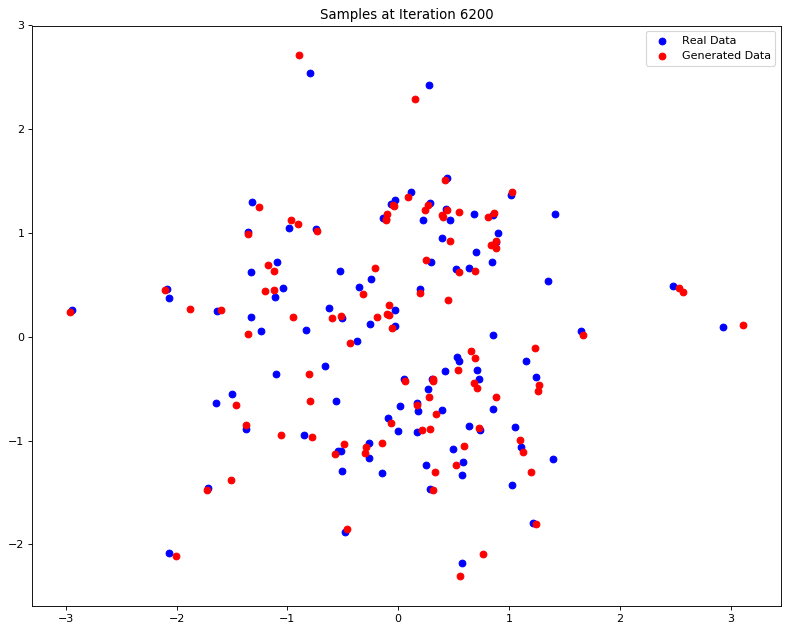

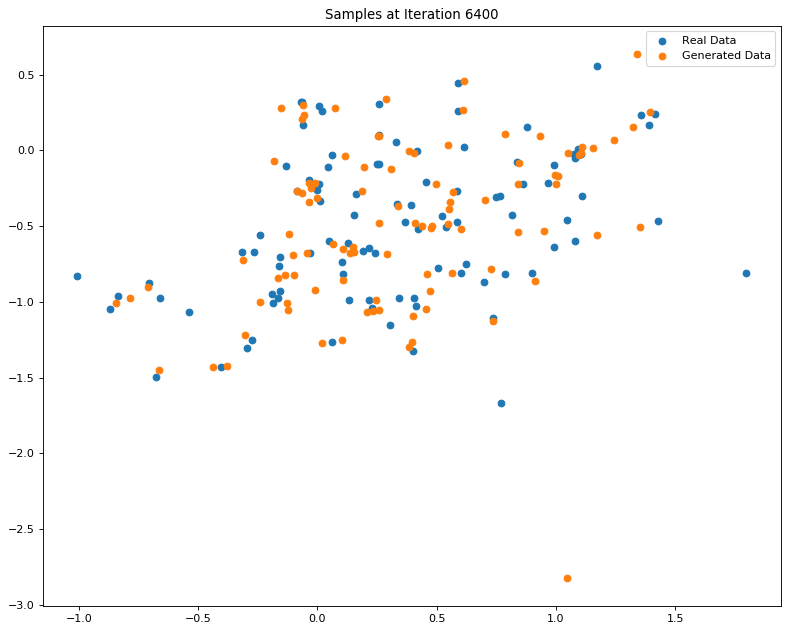

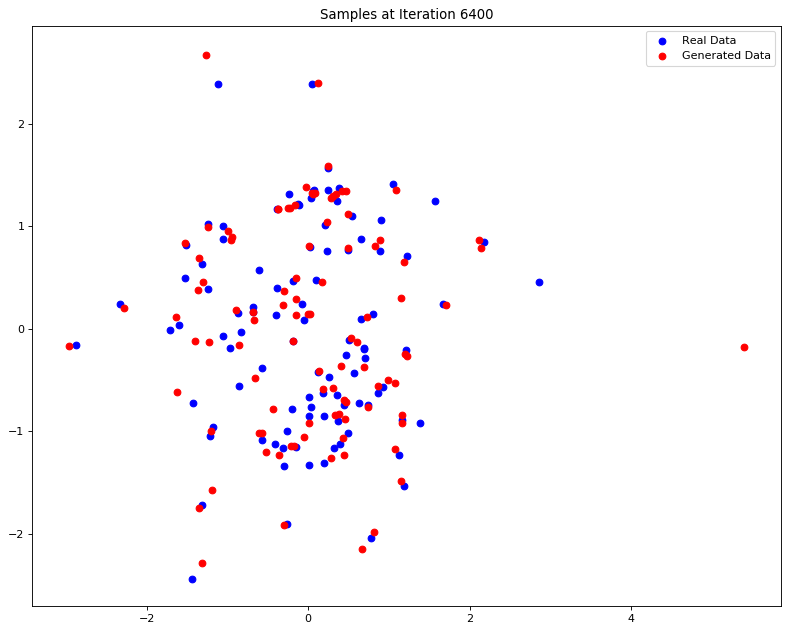

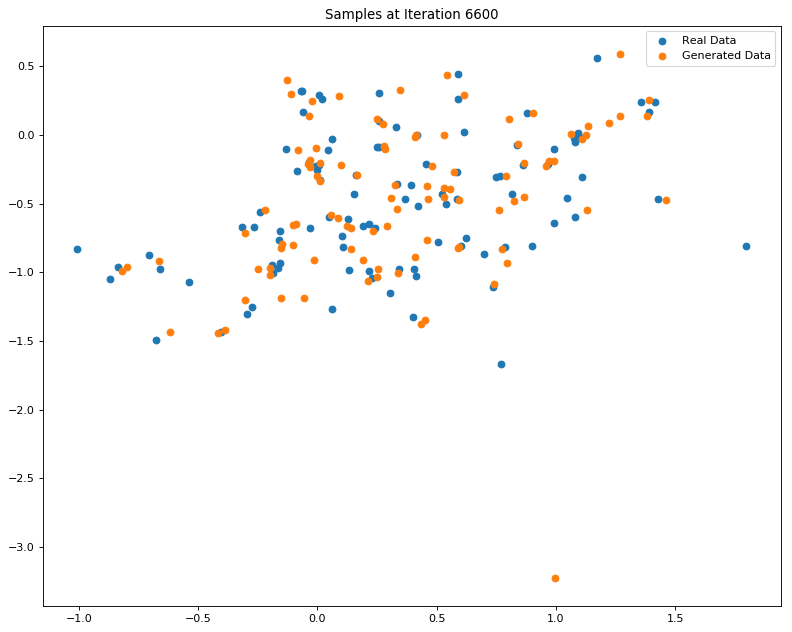

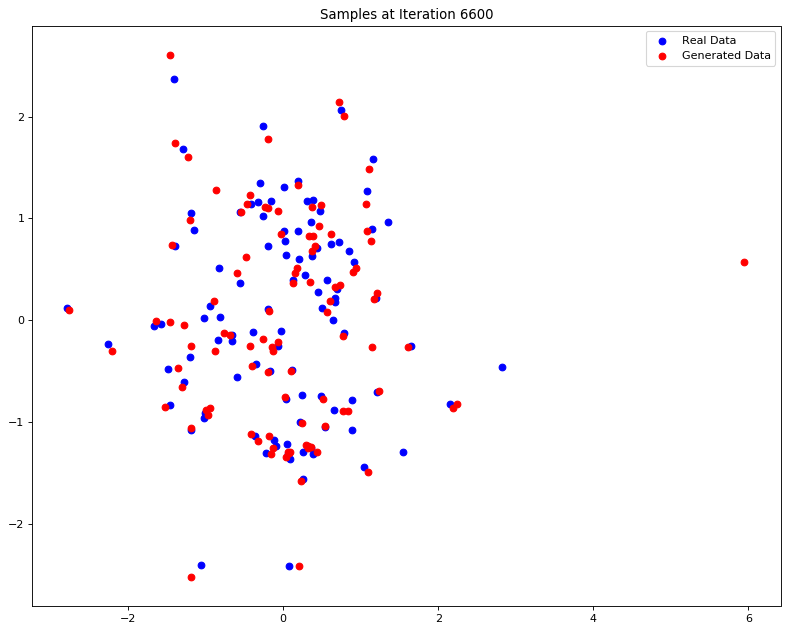

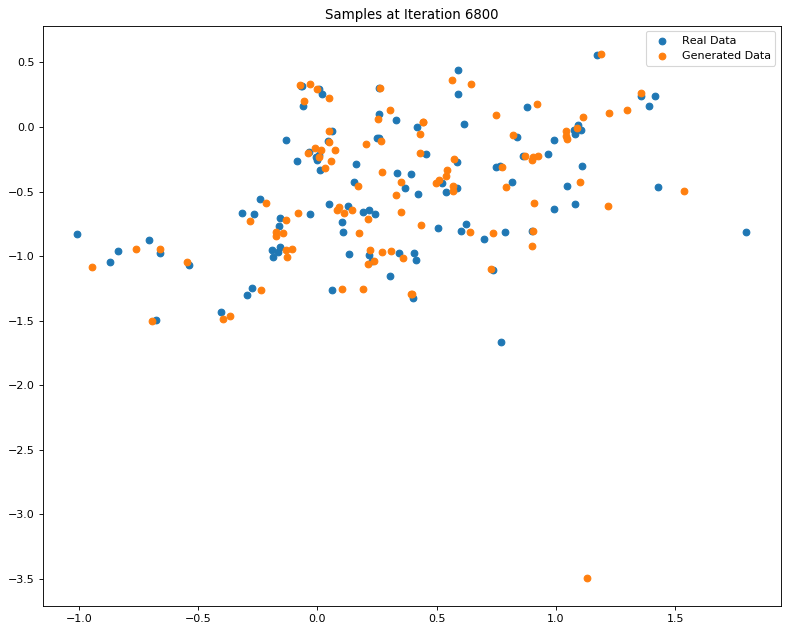

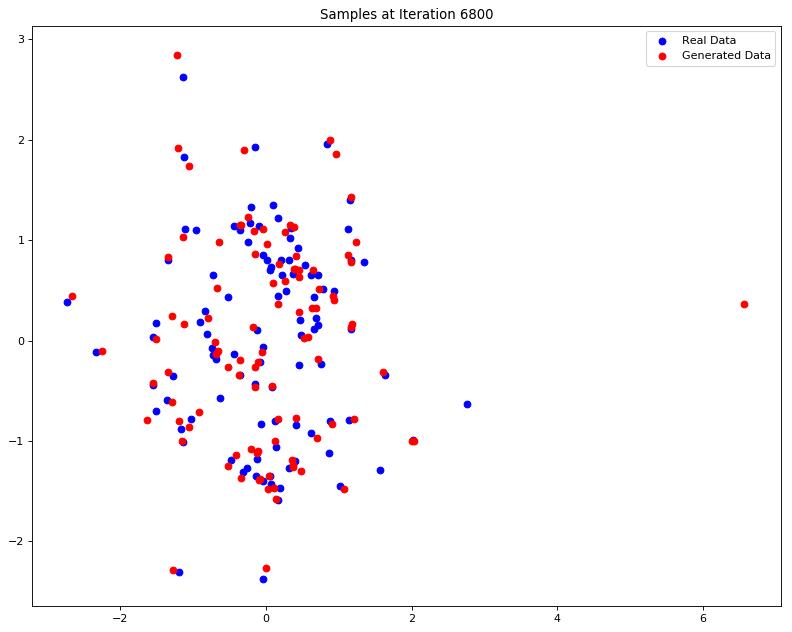

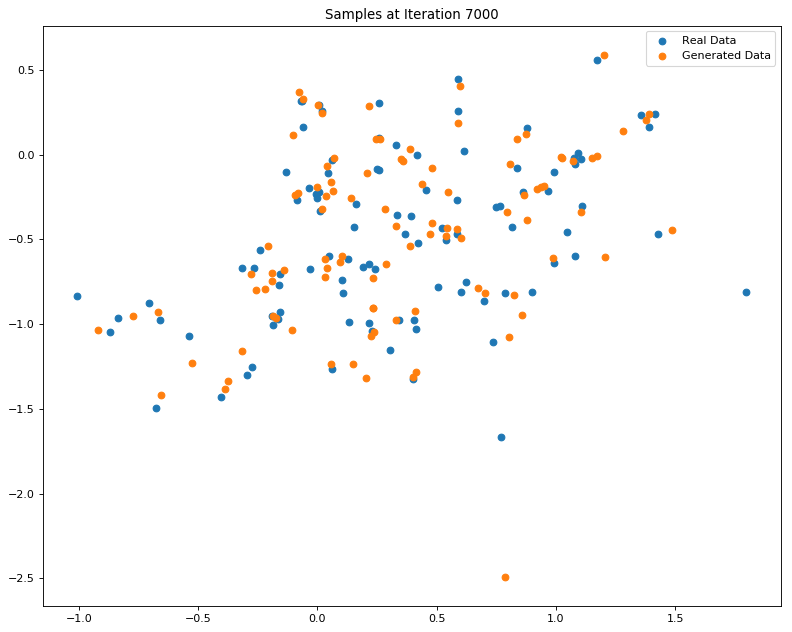

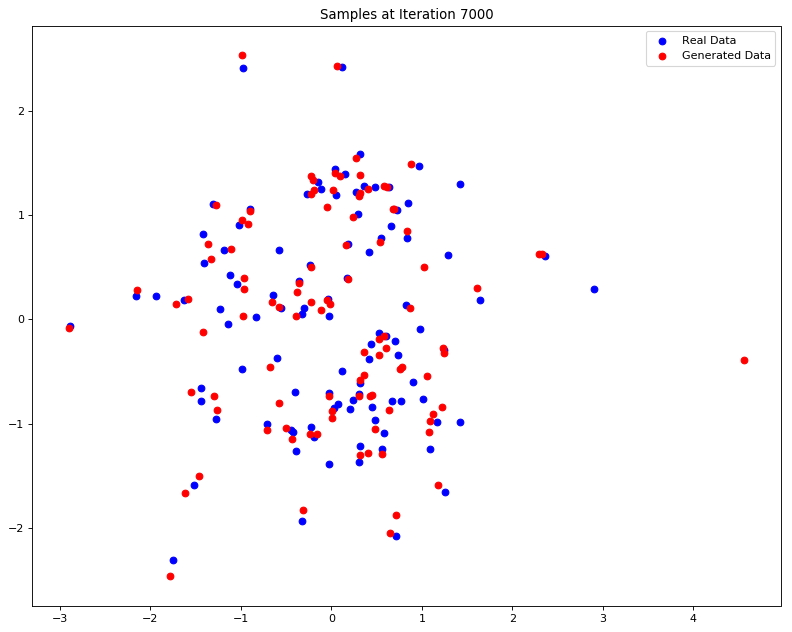

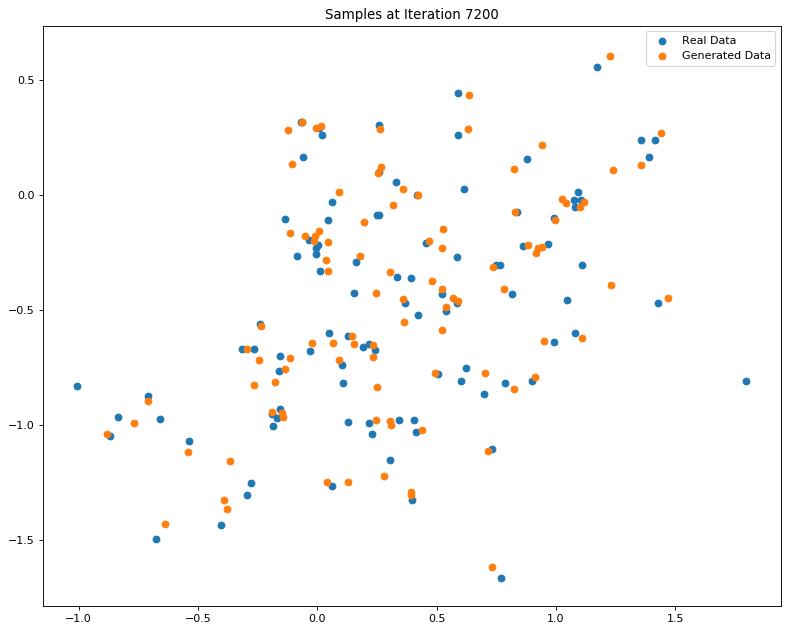

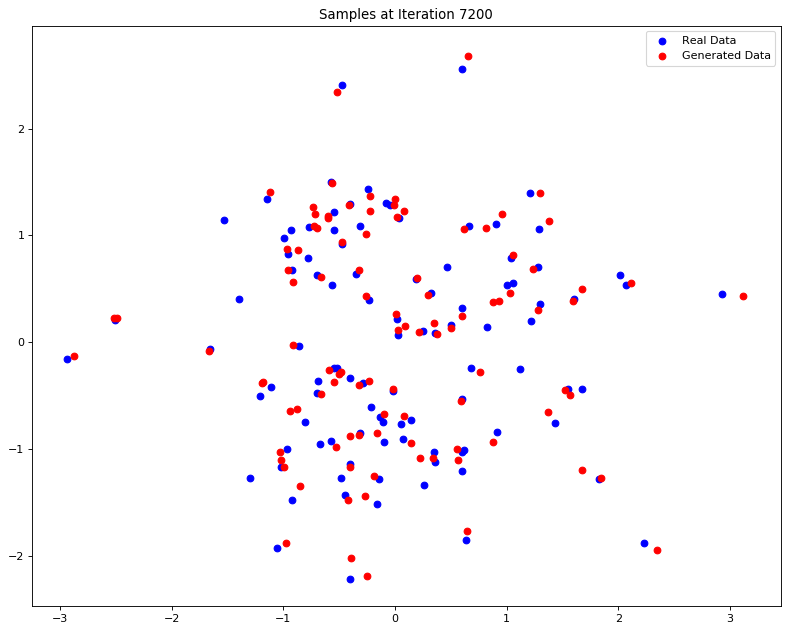

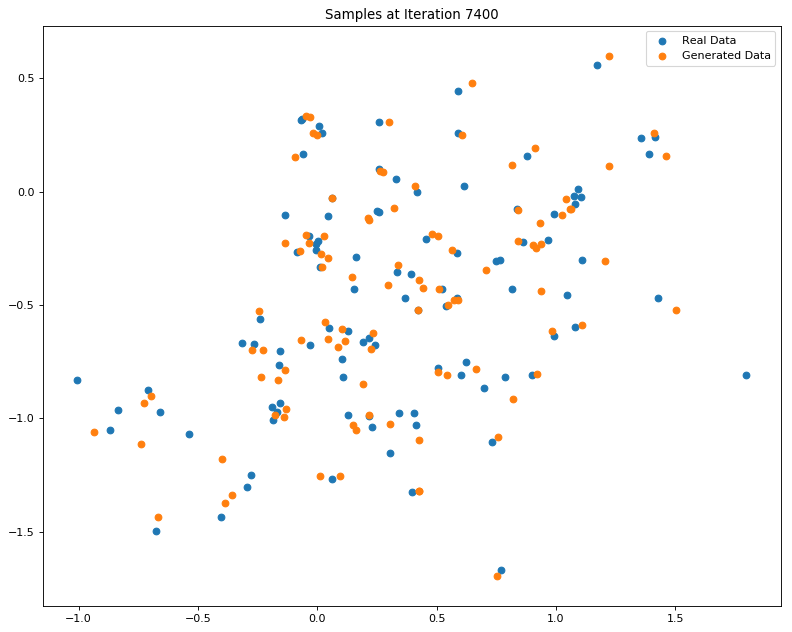

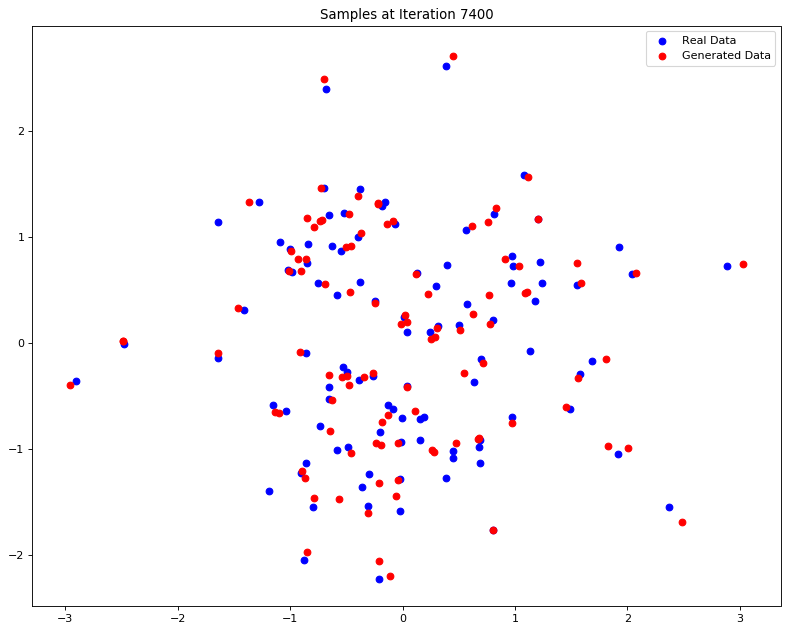

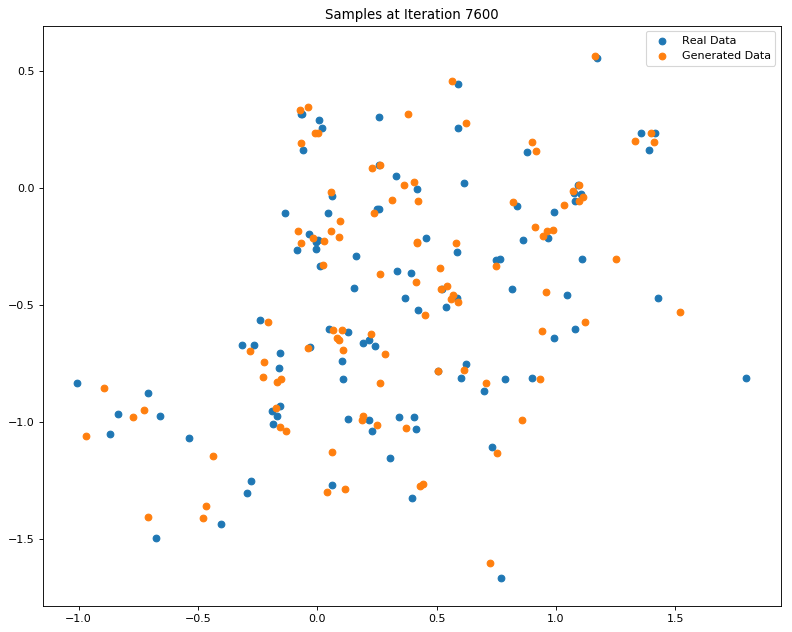

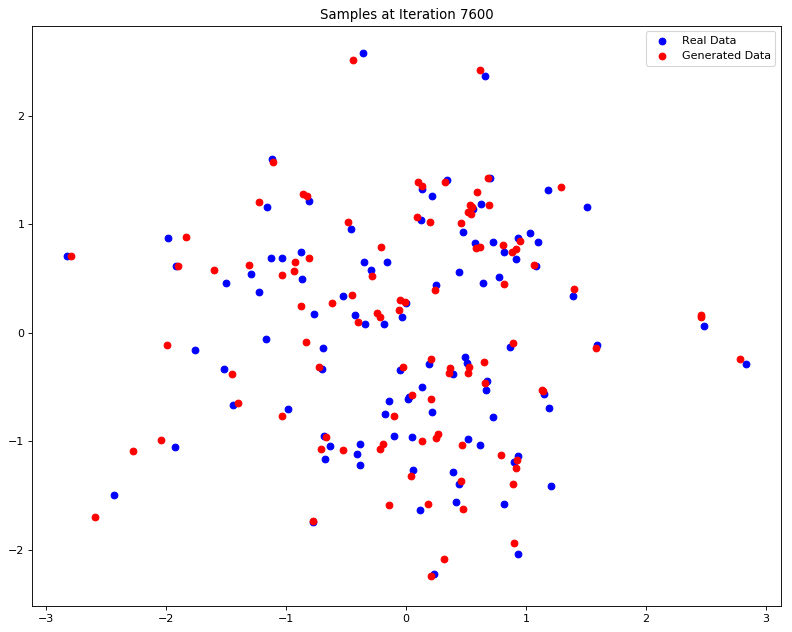

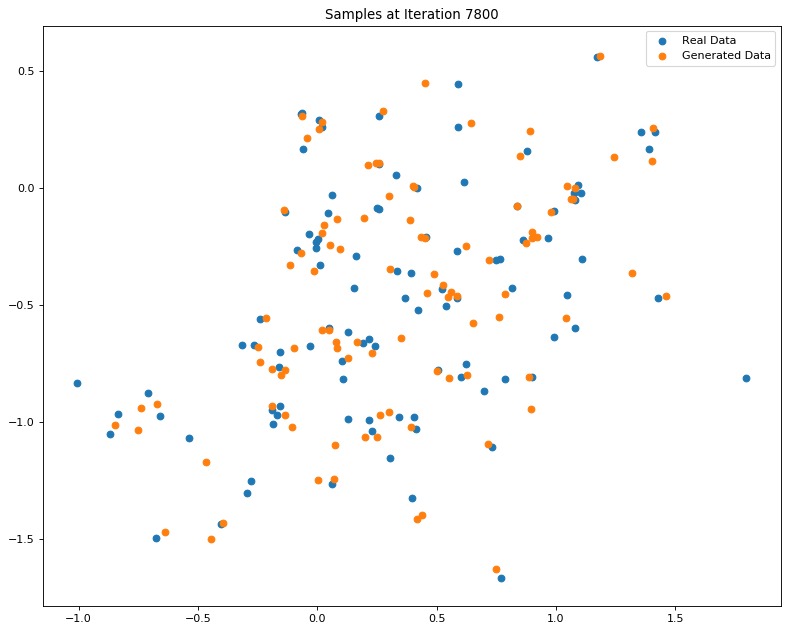

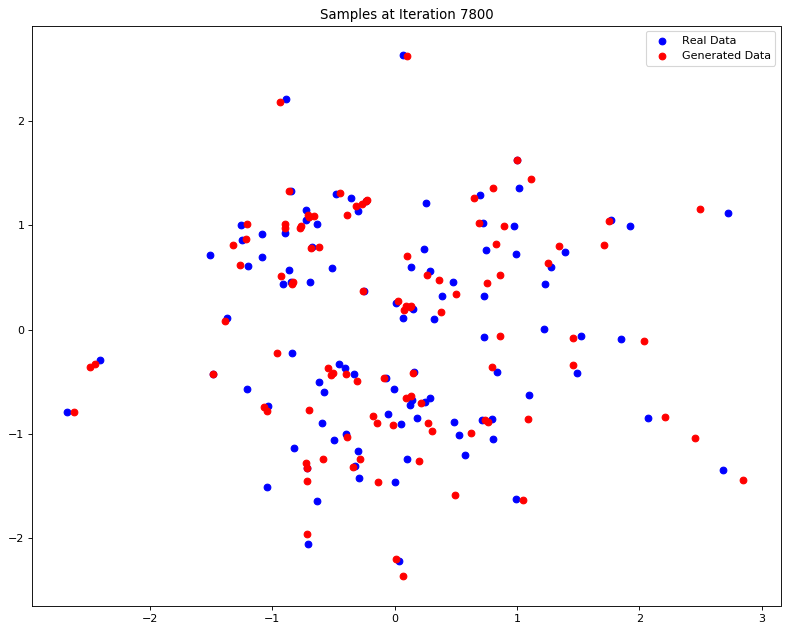

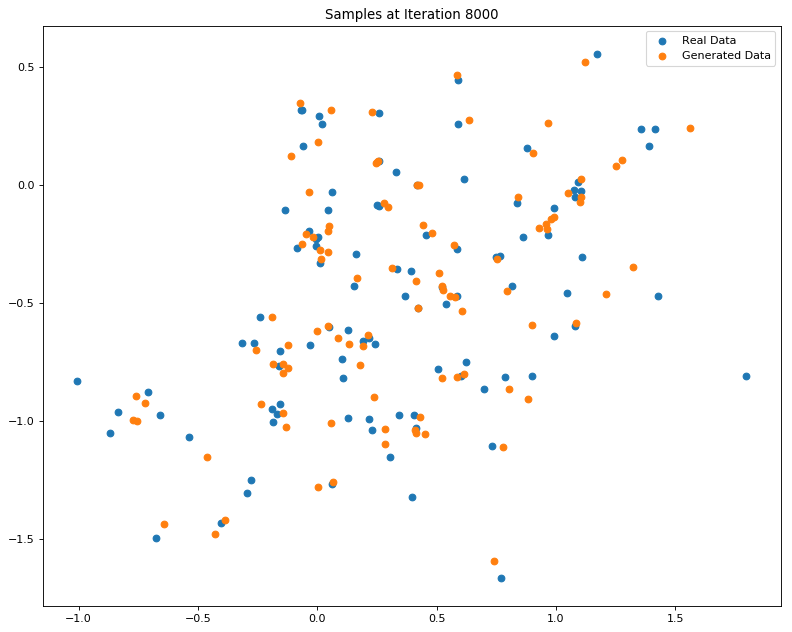

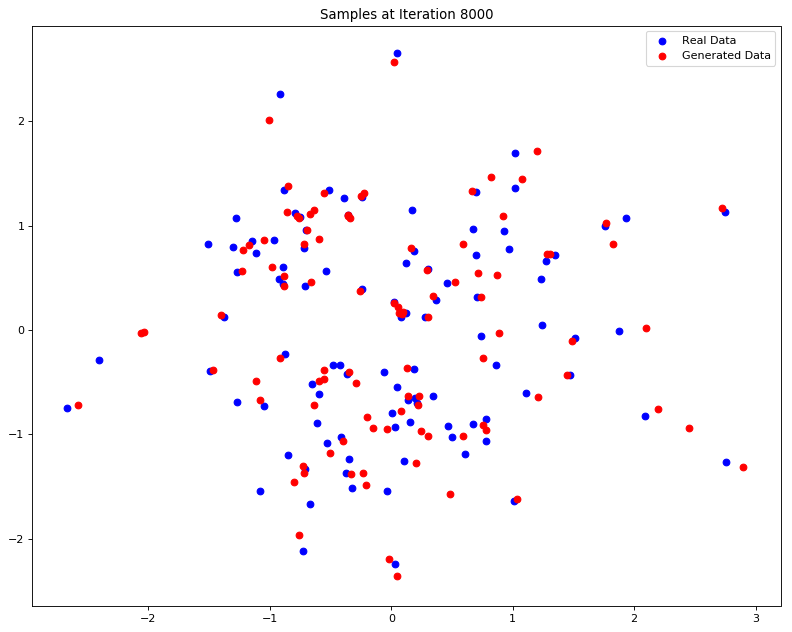

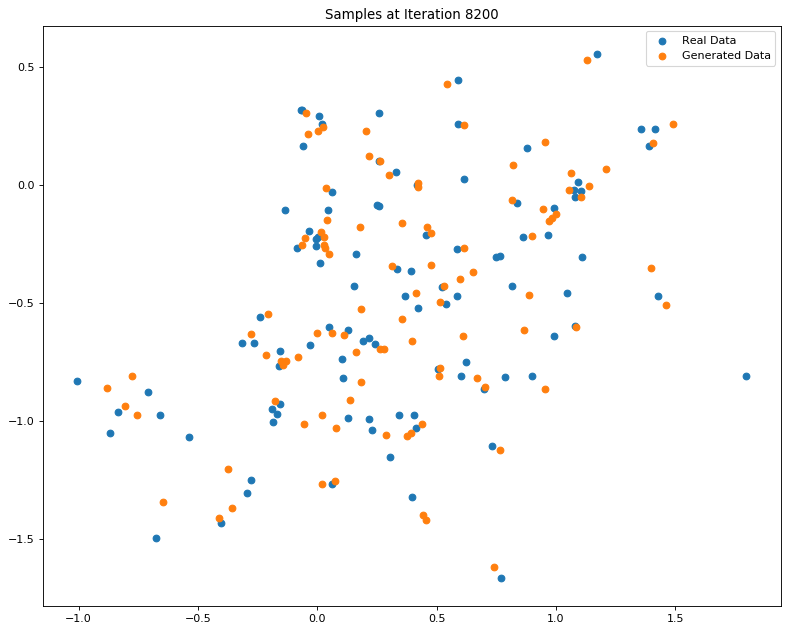

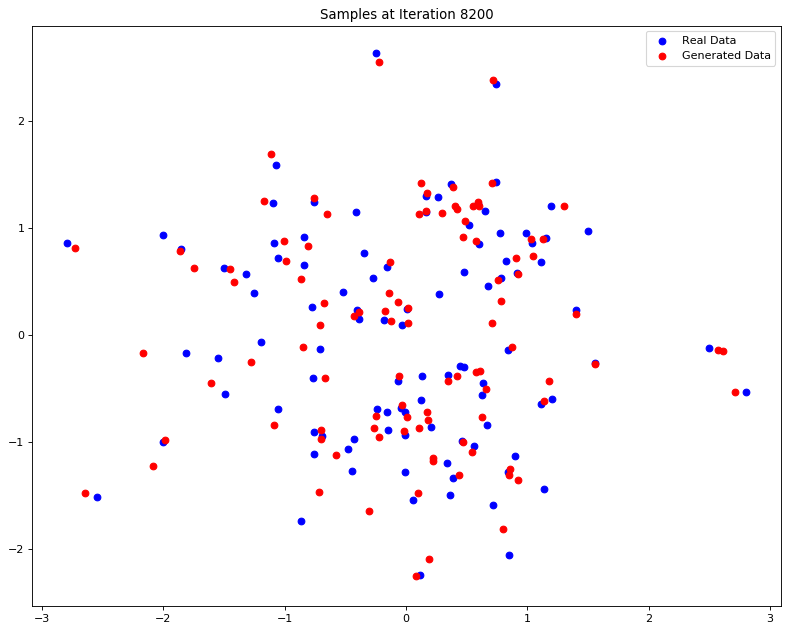

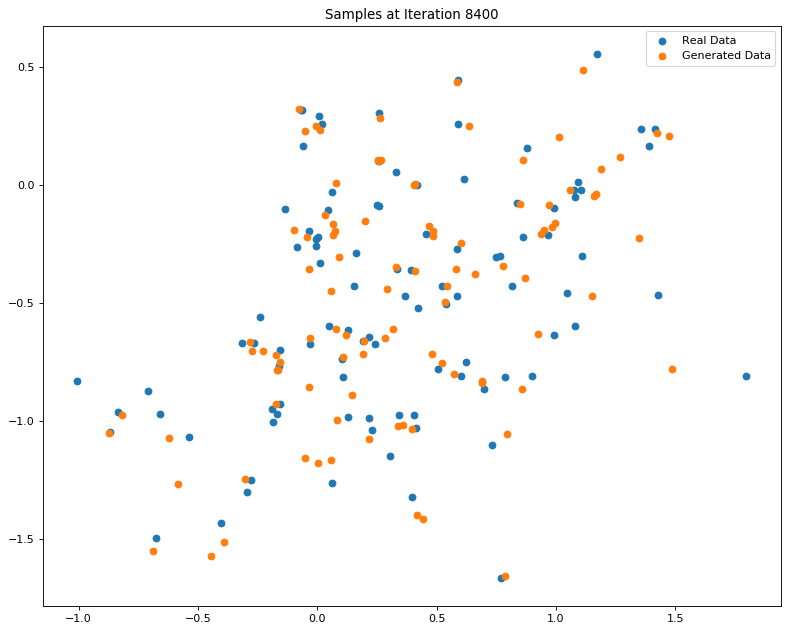

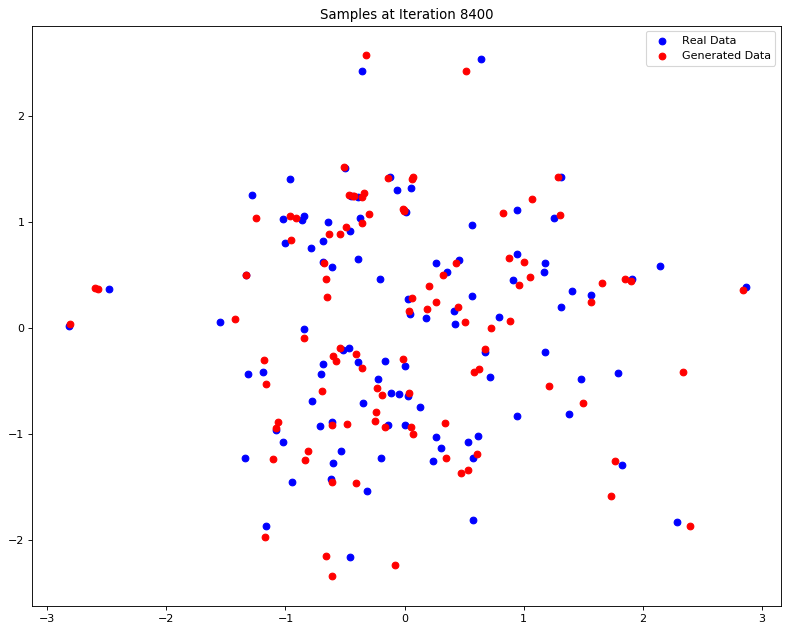

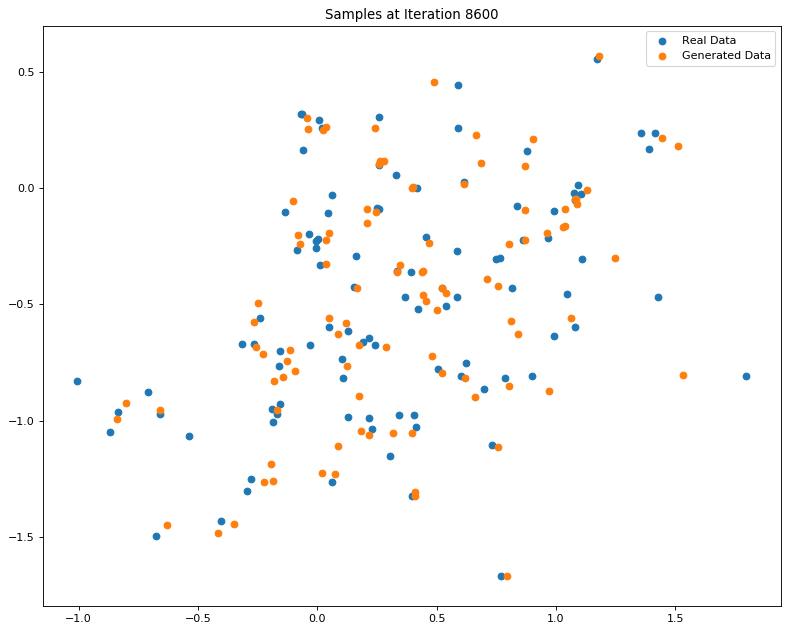

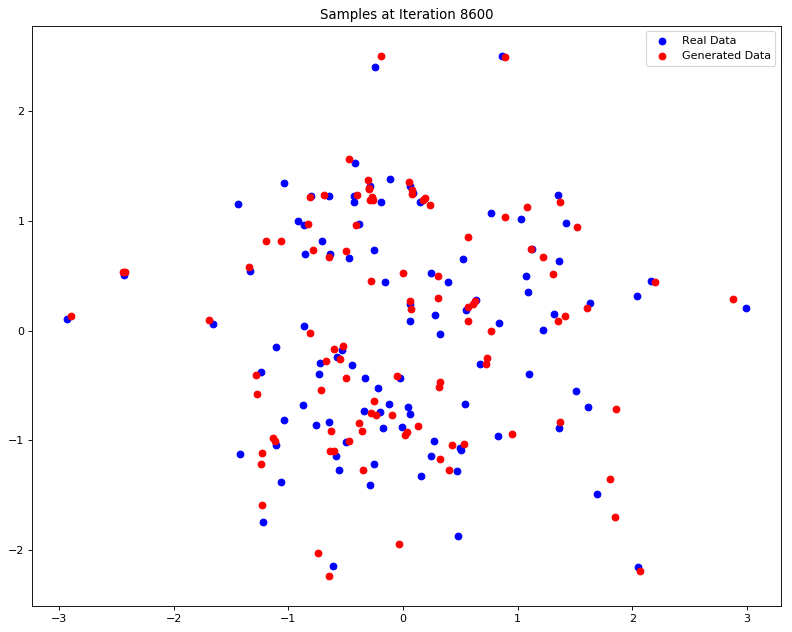

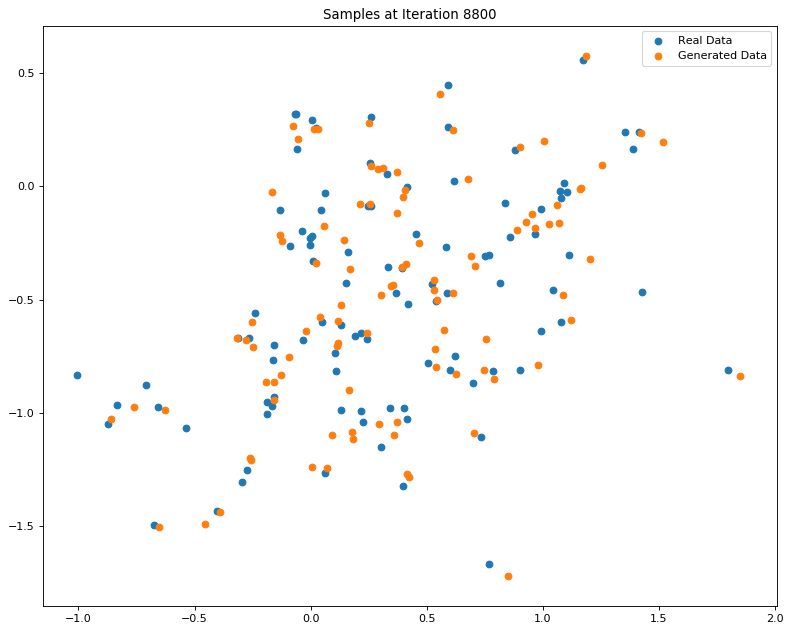

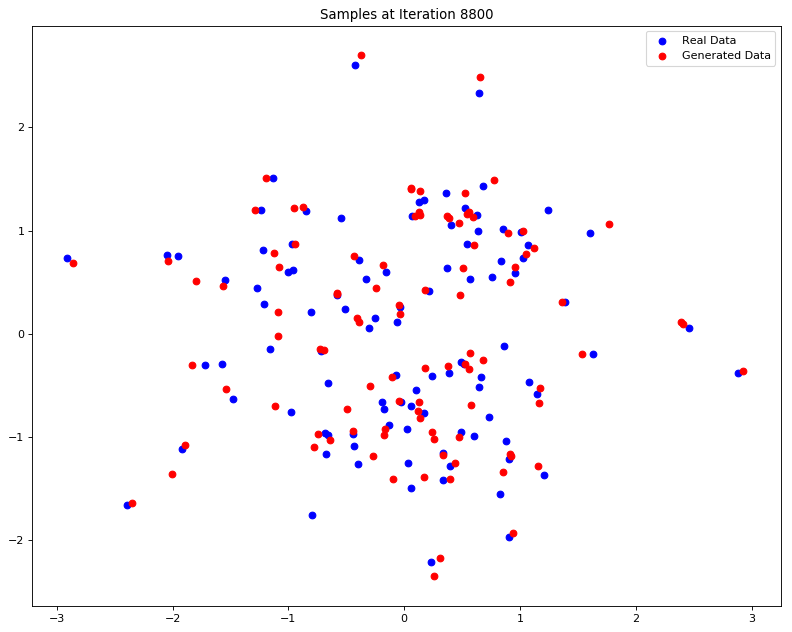

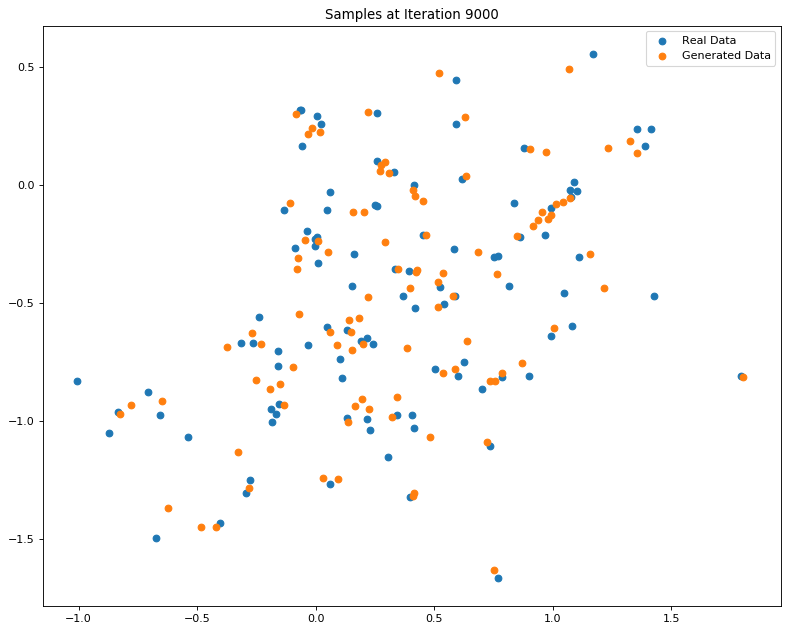

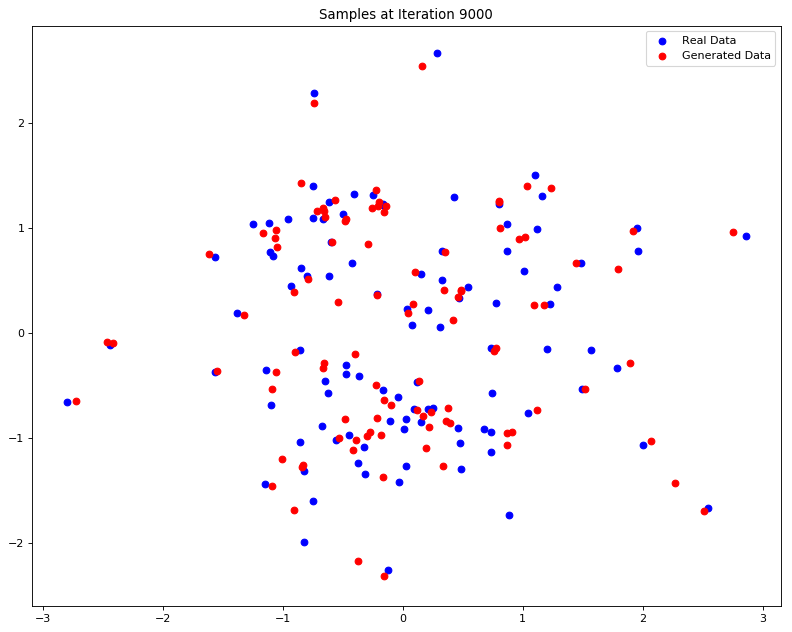

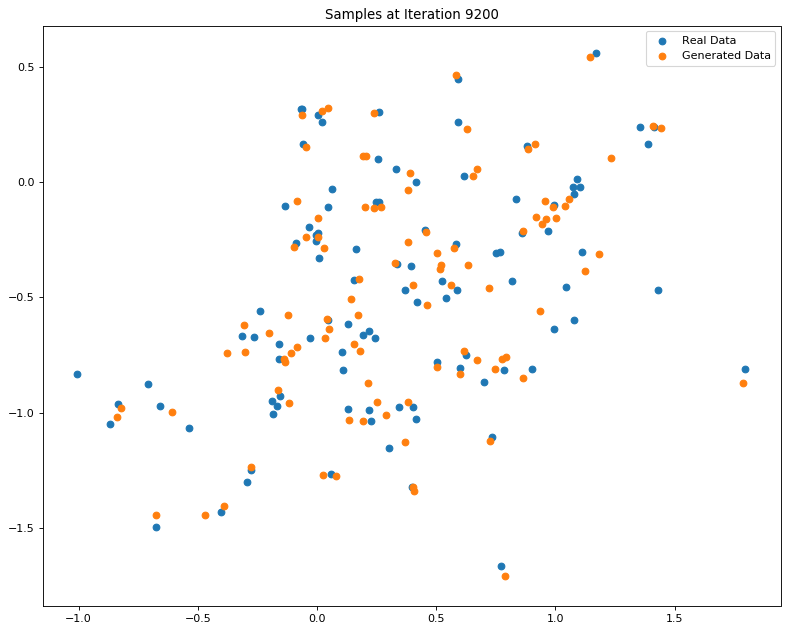

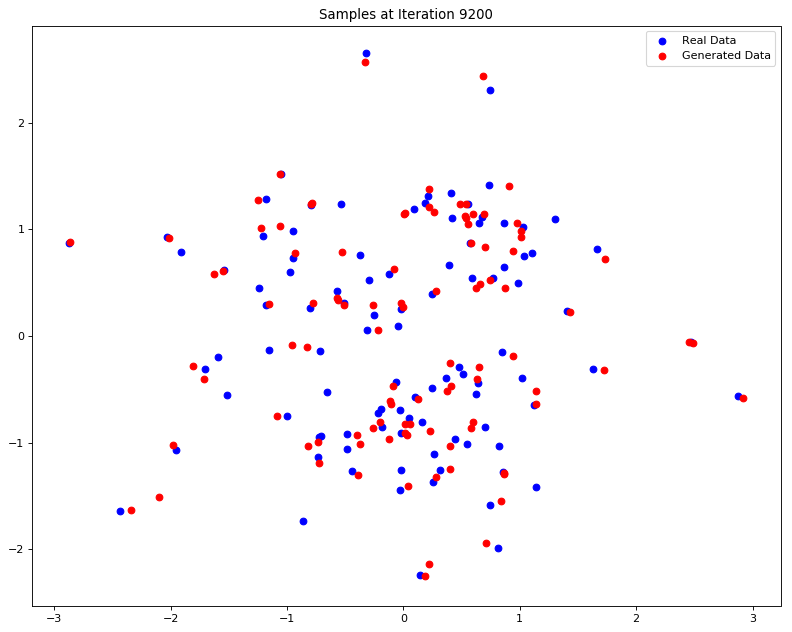

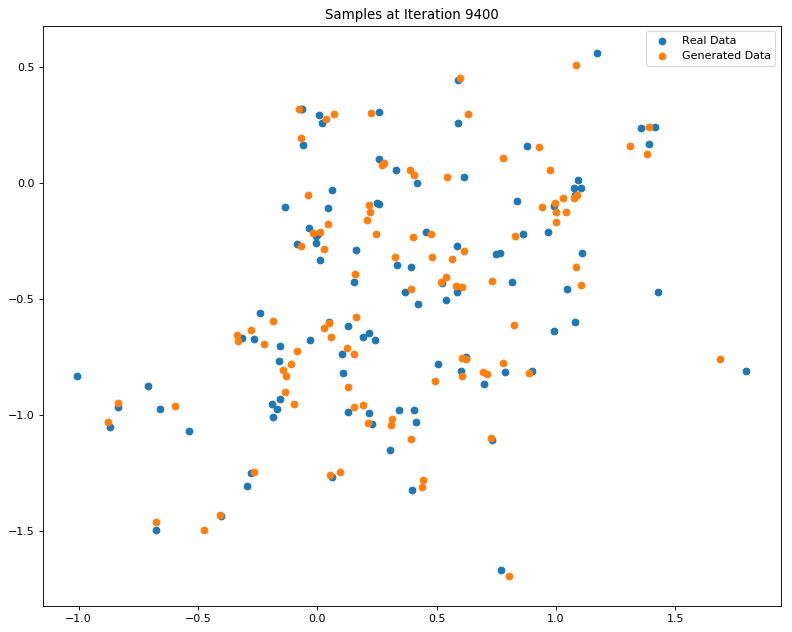

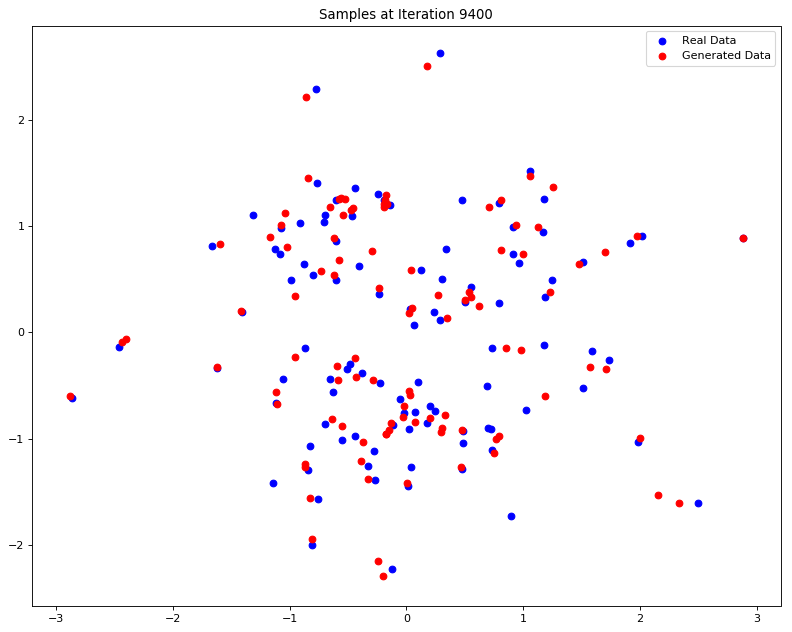

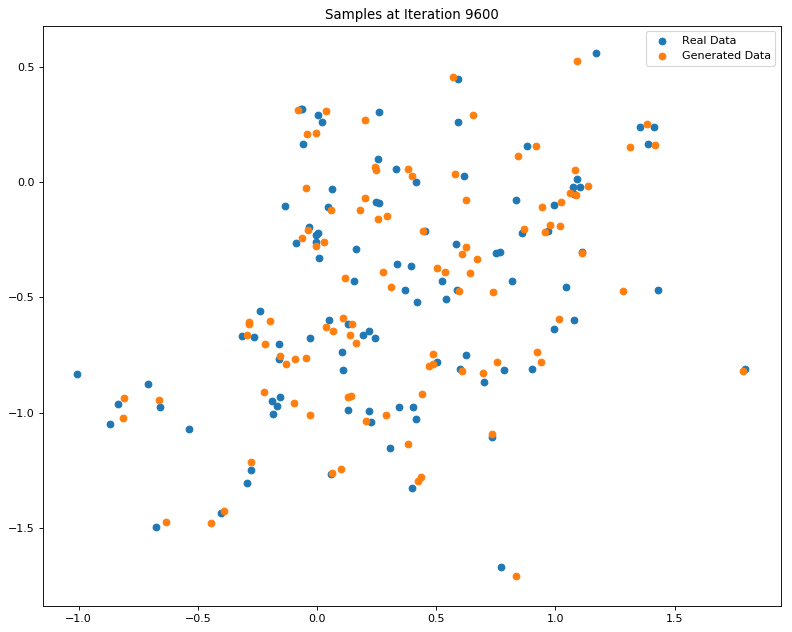

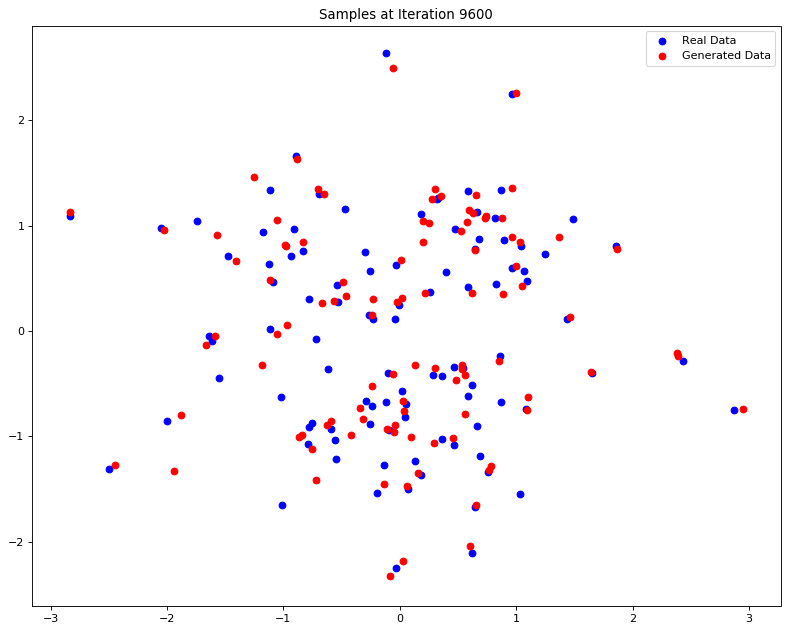

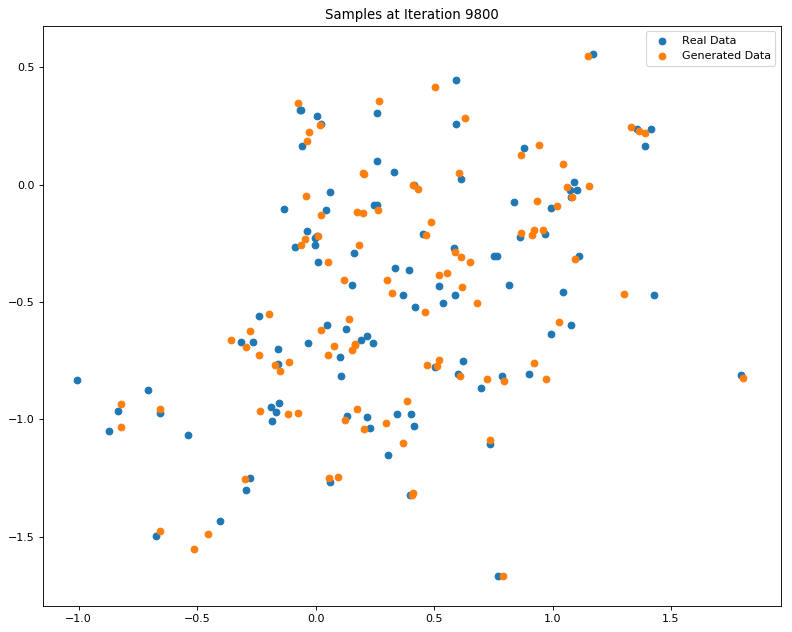

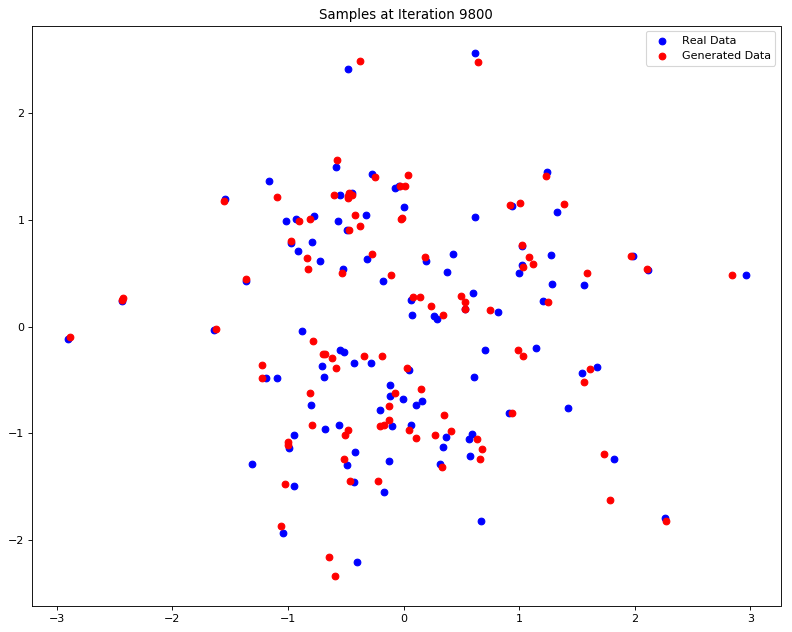

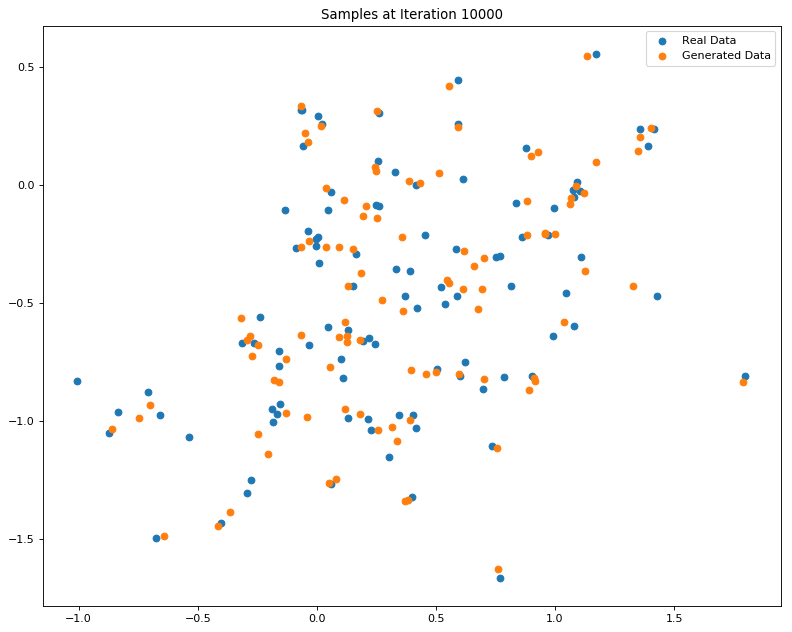

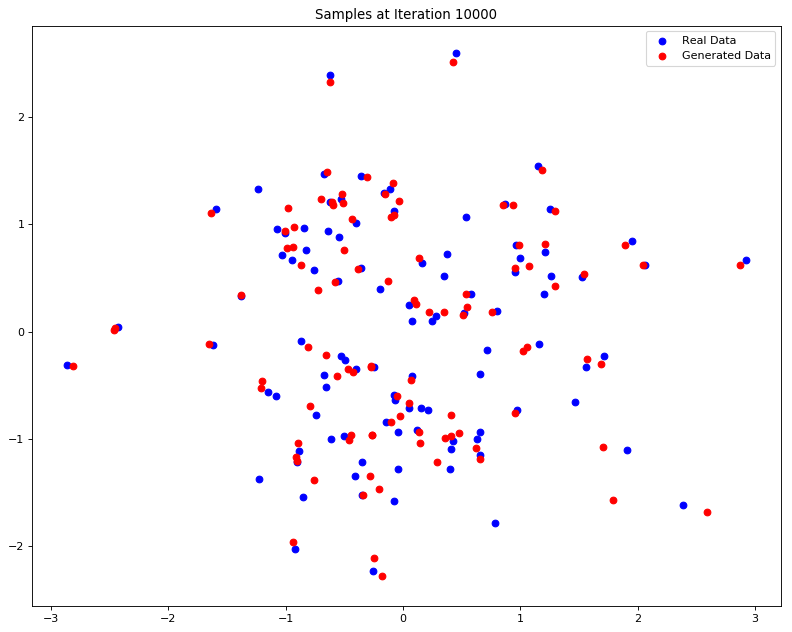

In [24]:
loss_dis = []
loss_gen = []
iterat = []
for i in range(10001):
    X_batch = X1
    Z_batch = X2[:batch_size]#sample_Z(batch_size, 5)

    for _ in range(nd_steps):
        _, dloss = sess.run([disc_step, disc_loss], feed_dict={X: X_batch, Z: Z_batch})
    rrep_dstep, grep_dstep = sess.run([r_rep, g_rep], feed_dict={X: X_batch, Z: Z_batch})

    for _ in range(ng_steps):
        _, gloss = sess.run([gen_step, gen_loss], feed_dict={Z: Z_batch})

    rrep_gstep, grep_gstep = sess.run([r_rep, g_rep], feed_dict={X: X_batch, Z: Z_batch})
    
    if i%10 == 0:
        print("Iterations: %d\t Discriminator loss: %.4f\t Generator loss: %.4f"%(i,dloss,gloss))
        #f.write("%d,%f,%f\n"%(i,dloss,gloss))
        loss_dis.append(dloss)
        loss_gen.append(gloss)
        iterat.append(i)

    if i%200 == 0:
        plt.figure(figsize=(10, 8), dpi=80)
        g_plot = sess.run(G_sample, feed_dict={Z: Z_batch})
        xax = plt.scatter(x_plot[:,0], x_plot[:,1])
        gax = plt.scatter(g_plot[:,0],g_plot[:,1])

        plt.legend((xax,gax), ("Real Data","Generated Data"))
        plt.title('Samples at Iteration %d'%i)
        plt.tight_layout()
        
        X4 = np.concatenate([X1, g_plot])
        result3 = pca.fit_transform(X4)
        plt.figure(figsize=(10, 8), dpi=80)
        xax1 = plt.scatter(result3[:100, 0], result3[:100, 1], c = 'b')
        gax1 = plt.scatter(result3[100:, 0], result3[100:, 1], c = 'r')
        plt.legend((xax1,gax1), ("Real Data","Generated Data"))
        plt.title('Samples at Iteration %d'%i)
        plt.tight_layout()
        #words1 = list(model1.wv.vocab)
        #for i, word in enumerate(words1):
        #plt.annotate(word, xy=(result1[i, 0], result1[i, 1]))
        #plt.show()

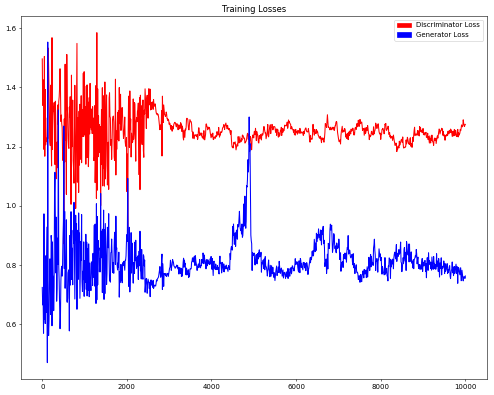

In [25]:
import matplotlib.patches as mpatches
plt.figure(figsize=(10, 8), dpi=50)
lossdis = plt.plot(iterat, loss_dis, c = 'r')
lossgen = plt.plot(iterat, loss_gen, c = 'b')
#plt.legend((lossdis,lossgen), ("Diskriminator Loss","Generator Loss"))
#plt.legend()
red_patch = mpatches.Patch(color='red', label='Discriminator Loss')
blue_patch = mpatches.Patch(color='blue', label='Generator Loss')
plt.legend(handles=[red_patch, blue_patch])
plt.title('Training Losses')
plt.tight_layout()
# plt.savefig('../plots/dataset.png')
#plt.savefig('../plots/training_loss.png')
#plt.show()